# Importing The Library

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import matplotlib
import matplotlib.pyplot as plt


from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, leaves_list
from scipy.spatial.distance import pdist, squareform


# Reading HumanCoding

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_row',50)
dfvr=pd.read_csv('OUTPUTFILE.csv')
dfvr

,Actual Reply,Human Coding
0,"confident, proud, bravery",confident
1,"detremination, passion, good work ethic, dedication, commitment to the people, hard working, commitment to the country and the constitution, dedicated",determination
2,"teamwork, friendly, eloquent, good negotiator, empathy, agreeable, able to compromise, polite, nice, caring about others, willingness to work with others, kindness, genuine care for others, compassion, teamwork skills, compassion, approachable, diplomacy",diplomacy
3,"integrity, honesty, making promises that can be fulfilled, trustworthy, honest, trustworthiness, no ulterior motives",honesty
4,"intelligence, common sense, logical, wise, smart, exceptionally smart, not being an idiot, have good ideas, vast knowledge",intelligence/knowledge
5,"decisiveness, capable of making crucial decisions when the time comes, leadership, achievement oriented in it for long term, levelheadedness, controlling, peaceful, calm, deliberate, selfless, level-headed, mature, sophisticated, problem solving ability, ability to stay calm in stressful situations, strong leadership, leadership skills",leadership
6,achievement oriented in it for the long term,long term vision
7,"well qualified, understandig of systems, background of politics, politically knowledgeable, experience, experience in politics, experience in political office, international relations experience, a basic understanding of sociology",political skills
8,"appeals to the whole county, inclusivity, unity, no prejudices, equality, ability to empathize with all different groups of people, serve the underprivileged and join people of different groups together, not prejudice",relate to diverse groups
9,"humble, humility",humble


In [3]:
stpwd=stopwords.words('english')
dfvr['size of AR']=None
dfvr['Bagged Actual Reply']=None
dfvr['size of BAR']=None
for i in range(dfvr.shape[0]):
    ls=dfvr["Actual Reply"][i]
    ls=ls.split(', ')
    szar=len(ls)
    ls=' '.join(ls)
    ls=ls.split(' ')
    ls=[e.lower() for e in ls if(e.lower() not in stpwd)]
    ls=set(ls)
    ls=tuple(ls)
    ls=set(ls)
    szbar=len(ls)
    dfvr['size of AR'][i]=szar
    dfvr['Bagged Actual Reply'][i]=ls
    dfvr['size of BAR'][i]=szbar

dfvr.sort_values(by=['size of BAR'],ascending=False, inplace=True)
dfvr.reset_index(drop=True,inplace=True)
dfvr.to_csv('OUTPUTT/HUMCoding.csv',index_label='SN.')
dfvr

,Actual Reply,Human Coding,size of AR,Bagged Actual Reply,size of BAR
0,"decisiveness, capable of making crucial decisions when the time comes, leadership, achievement oriented in it for long term, levelheadedness, controlling, peaceful, calm, deliberate, selfless, level-headed, mature, sophisticated, problem solving ability, ability to stay calm in stressful situations, strong leadership, leadership skills",leadership,17,"{calm, deliberate, sophisticated, skills, crucial, decisions, making, long, problem, comes, strong, decisiveness, stressful, mature, controlling, level-headed, situations, achievement, levelheadedness, oriented, term, peaceful, capable, selfless, leadership, solving, time, stay, ability}",29
1,"teamwork, friendly, eloquent, good negotiator, empathy, agreeable, able to compromise, polite, nice, caring about others, willingness to work with others, kindness, genuine care for others, compassion, teamwork skills, compassion, approachable, diplomacy",diplomacy,18,"{able, skills, nice, eloquent, diplomacy, willingness, polite, friendly, approachable, teamwork, work, empathy, others, compromise, agreeable, compassion, negotiator, genuine, caring, good, care, kindness}",22
2,"appeals to the whole county, inclusivity, unity, no prejudices, equality, ability to empathize with all different groups of people, serve the underprivileged and join people of different groups together, not prejudice",relate to diverse groups,8,"{empathize, underprivileged, groups, inclusivity, join, different, together, unity, county, whole, appeals, people, prejudice, serve, equality, prejudices, ability}",17
3,"well qualified, understandig of systems, background of politics, politically knowledgeable, experience, experience in politics, experience in political office, international relations experience, a basic understanding of sociology",political skills,9,"{experience, knowledgeable, office, international, systems, background, political, well, qualified, politically, relations, understanding, basic, politics, understandig, sociology}",16
4,"detremination, passion, good work ethic, dedication, commitment to the people, hard working, commitment to the country and the constitution, dedicated",determination,8,"{detremination, work, dedicated, good, passion, people, dedication, working, country, ethic, hard, constitution, commitment}",13
5,"intelligence, common sense, logical, wise, smart, exceptionally smart, not being an idiot, have good ideas, vast knowledge",intelligence/knowledge,9,"{wise, intelligence, knowledge, sense, logical, smart, vast, good, common, exceptionally, idiot, ideas}",12
6,"integrity, honesty, making promises that can be fulfilled, trustworthy, honest, trustworthiness, no ulterior motives",honesty,7,"{trustworthiness, honest, honesty, motives, ulterior, making, trustworthy, fulfilled, promises, integrity}",10
7,achievement oriented in it for the long term,long term vision,1,"{oriented, achievement, long, term}",4
8,"confident, proud, bravery",confident,3,"{confident, bravery, proud}",3
9,"humble, humility",humble,2,"{humble, humility}",2


# Check Match Case with HumanCodding Of Sample Outout

In [4]:
def match_count(col):
    mx1l, mx2l=[], []
    for te in col:
        mx1, mx2, ID1, ID2=0, 0, None, None
        te=set(te)
        for i in range(10):
            ba=dfvr['Bagged Actual Reply'][i]
            ins=te.intersection(ba)
            if(mx1<len(ins)):
                mx2=mx1
                mx1=len(ins)
                ID2=ID1
                ID1=((i,dfvr['Human Coding'][i], dfvr['size of AR'][i], dfvr['size of BAR'][i]))
        mx1l.append((mx1, ID1))
        mx2l.append((mx2, ID2))
    return(mx1l, mx2l)

# Reading The Data

In [5]:
df=pd.read_excel('pm_qualities_data.xlsx')
df

,What qualities do you think are necessary to be the prime minister of India?
0,"Intelligence, integrity, decisiveness"
1,"Honesty, passion, determination, teamwork"
2,U have to be well qualified
3,"Honesty, good work ethic, understanding of systems, preferably progressive"
4,Common sense
5,I'm not sure. There are a lot of qualities a president should have to be president of a country.
6,"Confident, eloquent, logical, wise, friendly, and humble"
7,"Smart, good negotiator, appeals to the whole county"
8,Honesty and dedication
9,Good Character


# Creating Bags Of Relevant Words From Comments

In [6]:
dt=df.rename(columns={'What qualities do you think are necessary to be the prime minister of India?':'WQYWPMI'})
cls=[]
for cmt in dt['WQYWPMI'].values:
    ls=cmt.split(' and ')
    ls=' , '.join(ls)
    ls=ls.split(' And ')
    ls=' , '.join(ls)
    ls=ls.split(' AND ')
    ls=' , '.join(ls)
    ls=ls.split(' ANd ')
    ls=' , '.join(ls)
    ls=ls.split(' & ')
    ls=' , '.join(ls)
    ls=ls.split('u.s.')
    ls='US '.join(ls)
    ls=ls.split('.')
    ls=' , '.join(ls)
    ls=ls.split(",")
    ls=[e.strip() for e in ls if(e!=' ' )]#and e!=', '
    cls.append(ls)
ncm=[None for i in range(len(cls))]
dt=pd.DataFrame(ncm,columns=['BagsOfQuality'])
for i in range(dt.shape[0]):
    dt['BagsOfQuality'][i]=cls[i]
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_row',40)
dt

,BagsOfQuality
0,"[Intelligence, integrity, decisiveness]"
1,"[Honesty, passion, determination, teamwork]"
2,[U have to be well qualified]
3,"[Honesty, good work ethic, understanding of systems, preferably progressive]"
4,[Common sense]
5,"[I'm not sure, There are a lot of qualities a president should have to be president of a country]"
6,"[Confident, eloquent, logical, wise, friendly, humble]"
7,"[Smart, good negotiator, appeals to the whole county]"
8,"[Honesty, dedication]"
9,[Good Character]


# Tagging POS To Words In Bag

In [7]:
dt1=dt.rename(columns={'BagsOfQuality':"DsWdOfQ"})
for i in range(dt1.shape[0]):
    ls=dt1["DsWdOfQ"][i]
    tls=[]
    for qu in ls:
        wd=qu.split(' ')
        ls1=nltk.pos_tag(wd)
        tls.append(ls1)
    dt1["DsWdOfQ"][i]=tls
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_row',40)
dt1

,DsWdOfQ
0,"[[(Intelligence, NN)], [(integrity, NN)], [(decisiveness, NN)]]"
1,"[[(Honesty, NN)], [(passion, NN)], [(determination, NN)], [(teamwork, NN)]]"
2,"[[(U, NNS), (have, VBP), (to, TO), (be, VB), (well, RB), (qualified, JJ)]]"
3,"[[(Honesty, NN)], [(good, JJ), (work, NN), (ethic, JJ)], [(understanding, NN), (of, IN), (systems, NNS)], [(preferably, RB), (progressive, JJ)]]"
4,"[[(Common, JJ), (sense, NN)]]"
5,"[[(I'm, NNP), (not, RB), (sure, JJ)], [(There, EX), (are, VBP), (a, DT), (lot, NN), (of, IN), (qualities, NNS), (a, DT), (president, NN), (should, MD), (have, VB), (to, TO), (be, VB), (president, NN), (of, IN), (a, DT), (country, NN)]]"
6,"[[(Confident, JJ)], [(eloquent, NN)], [(logical, JJ)], [(wise, NN)], [(friendly, RB)], [(humble, JJ)]]"
7,"[[(Smart, NN)], [(good, JJ), (negotiator, NN)], [(appeals, NNS), (to, TO), (the, DT), (whole, JJ), (county, NN)]]"
8,"[[(Honesty, NN)], [(dedication, NN)]]"
9,"[[(Good, JJ), (Character, NN)]]"


# Removing English Stop-Words From Woeds In Bag And Tagging POS

In [8]:
dt2=dt.rename(columns={'BagsOfQuality':"QWdOfPps"})
for i in range(dt2.shape[0]):
    ls=dt2["QWdOfPps"][i]
    tls=[]
    for qu in ls:
        wd=qu.split(' ')
        wd=[w for w in wd if(w.lower() not in stpwd)]
        ls1=nltk.pos_tag(wd)
        tls.append(ls1)
    dt2["QWdOfPps"][i]=tls
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_row',40)    
dt2

,QWdOfPps
0,"[[(Intelligence, NN)], [(integrity, NN)], [(decisiveness, NN)]]"
1,"[[(Honesty, NN)], [(passion, NN)], [(determination, NN)], [(teamwork, NN)]]"
2,"[[(U, NNP), (well, RB), (qualified, VBD)]]"
3,"[[(Honesty, NN)], [(good, JJ), (work, NN), (ethic, JJ)], [(understanding, VBG), (systems, NNS)], [(preferably, RB), (progressive, JJ)]]"
4,"[[(Common, JJ), (sense, NN)]]"
5,"[[(I'm, NNP), (sure, NN)], [(lot, NN), (qualities, NNS), (president, NN), (president, NN), (country, NN)]]"
6,"[[(Confident, JJ)], [(eloquent, NN)], [(logical, JJ)], [(wise, NN)], [(friendly, RB)], [(humble, JJ)]]"
7,"[[(Smart, NN)], [(good, JJ), (negotiator, NN)], [(appeals, NNS), (whole, JJ), (county, NN)]]"
8,"[[(Honesty, NN)], [(dedication, NN)]]"
9,"[[(Good, JJ), (Character, NN)]]"


# Creating Data And Vocabulary With Diffrent Selection Scheme On POS
# Only Based On Synsets

In [9]:
posOPps=['NN','NNS','NNP','NNPS','JJ','JJS','JJR','RB','RBR','RBS','VBN','VB','VBG','VBD']
posOPps1=['NN','NNS','NNP','NNPS','JJ','JJS','JJR','RB','RBR','RBS']
posOPps2=['NN','NNS','NNP','NNPS','JJ','JJS','JJR']
#'NN':'noun, singular','NNS':'noun plural','NNP':'proper noun, singular','NNPS':proper noun, plural,
#'JJ':'adjective ','JJR':'adjective, comparative','JJS':'adjective, superlative ',
#'RB':adverb,'RBR':'adverb, comparative','RBS': 'adverb, superlative' 
#'VB': 'verb, base form','VBG':'verb, gerund/present participle',
#'VBN':'verb, past participle','VBD': 'verb, past tense', 'VBN': 'verb, past participle' ,
#'VBP': 'verb, sing. present,non-3d','VBZ': 'verb, 3rd person sing. present' 
doc, doc1, doc2=[], [], []
Vcub, Vcub1, Vcub2=[], [], []
dt3=dt.rename(columns={'BagsOfQuality':"QWdOfPps"})
data=dt.rename(columns={'BagsOfQuality':"QWdOfPps"})
data1=dt.rename(columns={'BagsOfQuality':"QWdOfPps"})
data2=dt.rename(columns={'BagsOfQuality':"QWdOfPps"})
for i in range(dt3.shape[0]):
    cmls=dt3["QWdOfPps"][i]
    cml, cml1, cml2=[], [], []
    tls, tls1, tls2=[], [], []
    for qu in cmls:
        wd=qu.split(' ')
        wd=[w for w in wd if(w.lower() not in stpwd)]
        ls0=nltk.pos_tag(wd)
        
        ls=[e for e in ls0 if(e[1] in posOPps)]
        ls1=[e for e in ls0 if(e[1] in posOPps1)]
        ls2=[e for e in ls0 if(e[1] in posOPps2)]
        
        if(ls!=[]):
            ad=[Vcub.append(e[0]) for e in ls]
            ad=[cml.append(e[0]) for e in ls]
            tls.append(ls)
            
        if(ls1!=[]):
            ad=[Vcub1.append(e[0]) for e in ls1]
            ad=[cml1.append(e[0]) for e in ls1]
            tls1.append(ls1) 
            
        if(ls2!=[]):
            ad=[Vcub2.append(e[0]) for e in ls2]
            ad=[cml2.append(e[0]) for e in ls2]
            tls2.append(ls2)
            

    data["QWdOfPps"][i]=tls
    doc.append(' '.join(cml))
    data1["QWdOfPps"][i]=tls1
    doc1.append(' '.join(cml1))
    data2["QWdOfPps"][i]=tls2
    doc2.append(' '.join(cml2))

In [10]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_columns',40) 
pd.set_option('max_row',10) 
print(len(Vcub),len(Vcub1),len(Vcub2))

192 175 168


In [11]:
nv, vcuswsyn, nv1, vcuswsyn1, nv2, vcuswsyn2=[], [], [], [], [], []
Vcub=[e.lower() for e in Vcub]
Vcub1=[e.lower() for e in Vcub1]
Vcub2=[e.lower() for e in Vcub2]
vcus, vcus1, vcus2=set(Vcub), set(Vcub1), set(Vcub2)
print('0 : ',len(Vcub),len(vcus),'  :: 1 : ',len(Vcub1),len(vcus1),'  :: 2 : ',len(Vcub2),len(vcus2))

0 :  192 132   :: 1 :  175 118   :: 2 :  168 112


# Getting Synset

In [12]:
def a_synset(e):
    syn=wn.synsets(e)#All, wn.NOUN
    lem=wn.lemmas(e)
    if(lem!=[]):
        for lm in lem:
            dre=lm.derivationally_related_forms()
            if(dre!=[]):
                for dr in dre:
                    syn.append(dr.synset())
    return(syn)   

# Calulating Similarity Score Using wup_similarity

In [13]:
def simscore_WP(synr, sync):
    siml=[]
    for er in synr:
        for ec in sync:
            siml.append(wn.wup_similarity(er, ec))
    if(None not in siml):
        return(max(siml))
    if(None in siml):
        cntl=len(siml)
        siml=[el for el in siml if(el!=None)]
        if(siml!=[]):
            #return(sum(siml)/cntl)
            if(cntl<=1.4*len(siml)):
                return(max(siml))
            if(1.4*len(siml)<cntl<=2*len(siml)):
                return(sum(siml)/len(siml))
            if(2*len(siml)<cntl<=2.7*len(siml)):
                return(sum(siml)/cntl)
            if(2.7*len(siml)<cntl):
                return(min(siml))
        if(siml==[]):
            return(0)

# Calulating Similarity Score Using path_similarity

In [14]:
def simscore_PTH(synr, sync):
    siml=[]
    for er in synr:
        for ec in sync:
            siml.append(wn.path_similarity(er, ec))
    if(None not in siml):
        return(max(siml))
    if(None in siml):
        cntl=len(siml)
        siml=[el for el in siml if(el!=None)]
        if(siml!=[]):
            #return(sum(siml)/cntl)
            if(cntl<=1.4*len(siml)):
                return(max(siml))
            if(1.4*len(siml)<cntl<=2*len(siml)):
                return(sum(siml)/len(siml))
            if(2*len(siml)<cntl<=2.7*len(siml)):
                return(sum(siml)/cntl)
            if(2.7*len(siml)<cntl):
                return(min(siml))
        if(siml==[]):
            return(0)

# Creating Similarity Matrix DataFrame From Similarity Score For wup_similarity

In [15]:
wp_simD=pd.DataFrame(None, index=vcus, columns=vcus)
for e in wp_simD.index:
    synr=a_synset(e)#All, wn.NOUN
    vcuswsyn.append((e, synr))
    if(synr!=[]):
        for ec in wp_simD.columns:
            sync=a_synset(ec)
            if(sync!=[]):
                wp_simD[ec][e]=simscore_WP(synr, sync)
                #wp_simD[ec][e]=wn.wup_similarity(synr[0],sync[0])
    if(synr==[]):
         nv.append(e)
wp_simD.fillna(0,inplace=True)
wp_simD

,able,course,nice,decisions,ulterior,trustworthy,dedication,prejudice,prejudices,problem,strong,friendly,inclusivity,motives,join,controlling,u,passion,empathy,serve,...,sense,teamwork,mature,idiot,working,character,constitution,basic,humble,achievement,oriented,compassion,term,knowledgeable,confident,promises,leader,knowledge,politically,care
able,0.292000,0.099403,0.133333,0.407393,0.000000,0.400000,0.307692,0.307692,0.307692,0.333333,0.000000,0.200000,0,0.329772,0.135629,0.000000,0.124305,0.429342,0.333333,0.142857,...,0.153846,0.416667,0.181818,0.181818,0.166667,0.181818,0.112262,0.166667,0.307692,0.333333,0.000000,0.333333,0.173241,0.170455,0.285714,0.307692,0.142857,0.666667,0.000000,0.250000
course,0.249676,1.000000,0.233848,0.800000,0.285714,0.245744,0.231243,0.214033,0.197807,0.226471,0.285714,0.241297,0,0.666667,0.233889,0.181818,0.428571,0.461538,0.113438,0.227232,...,0.234392,0.666667,0.235127,0.278728,0.111111,0.212781,0.199184,0.273541,0.230593,0.268979,0.166667,0.209171,0.631579,0.222230,0.223554,0.231583,0.249168,0.545455,0.285714,0.210666
nice,0.133333,0.095238,0.111111,0.117797,0.000000,0.133333,0.111111,0.111111,0.111111,0.117647,0.000000,0.111111,0,0.100263,0.100000,0.000000,0.105263,0.135456,0.117647,0.090909,...,0.100000,0.106519,0.117647,0.142857,0.133333,0.105263,0.095238,0.117647,0.111111,0.117647,0.000000,0.117647,0.105263,0.125000,0.105263,0.111111,0.117647,0.134392,0.000000,0.095238
decisions,0.407393,0.238271,0.117797,1.000000,0.000000,0.387213,0.154695,0.285714,0.285714,0.325128,0.000000,0.261707,0,0.625000,0.362759,0.000000,0.285714,0.666667,0.250000,0.111111,...,0.139510,0.625000,0.246476,0.145714,0.125000,0.316201,0.267178,0.125000,0.133997,0.509872,0.000000,0.120923,0.555556,0.358095,0.113586,0.285714,0.301099,0.615385,0.000000,0.353631
ulterior,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
promises,0.615385,0.714286,0.400000,0.705882,0.305357,0.400000,0.909091,0.500000,0.500000,0.615385,0.305357,0.400000,0,0.666667,0.625000,0.239075,0.400000,0.666667,0.400000,0.526316,...,0.666667,0.666667,0.400000,0.400000,0.252008,0.625000,0.588235,0.461538,0.400000,0.714286,0.235679,0.400000,0.666667,0.400000,0.400000,1.000000,0.714286,0.666667,0.305357,0.666667
leader,0.909091,0.800000,0.270643,0.666667,0.151905,0.308715,0.267131,0.256926,0.232677,0.283899,0.151905,0.285231,0,0.615385,0.631579,0.113528,0.500000,0.666667,0.321256,0.240661,...,0.283712,0.666667,0.265141,0.287539,0.129509,0.750000,0.588235,0.301918,0.294488,0.289590,0.111655,0.259439,0.533333,0.500000,0.288593,0.261857,1.000000,0.800000,0.151905,0.800000
knowledge,0.666667,0.290657,0.134392,0.615385,0.000000,0.444444,0.194529,0.666667,0.666667,0.484848,0.000000,0.320707,0,0.750000,0.400936,0.000000,0.333333,0.727273,0.363636,0.153846,...,0.232588,0.545455,0.324747,0.200000,0.181818,0.427685,0.316814,0.181818,0.155556,0.545455,0.000000,0.145455,0.615385,0.400000,0.134266,0.545455,0.420254,1.000000,0.000000,0.414286
politically,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [16]:
wp_simD1=pd.DataFrame(None, index=vcus1, columns=vcus1)
for e in wp_simD1.index:
    synr=a_synset(e)#All, wn.NOUN
    vcuswsyn1.append((e, synr))
    if(synr!=[]):
        for ec in wp_simD1.columns:
            sync=a_synset(ec)
            if(sync!=[]):
                wp_simD1[ec][e]=simscore_WP(synr, sync)
                #wp_simD[ec][e]=wn.wup_similarity(synr[0],sync[0])
    if(synr==[]):
         nv1.append(e)
wp_simD1.fillna(0,inplace=True)

In [17]:
wp_simD2=pd.DataFrame(None, index=vcus2, columns=vcus2)
for e in wp_simD2.index:
    synr=a_synset(e)#All, wn.NOUN
    vcuswsyn2.append((e, synr))
    if(synr!=[]):
        for ec in wp_simD2.columns:
            sync=a_synset(ec)
            if(sync!=[]):
                wp_simD2[ec][e]=simscore_WP(synr, sync)
                #wp_simD[ec][e]=wn.wup_similarity(synr[0],sync[0])
    if(synr==[]):
         nv2.append(e)
wp_simD2.fillna(0,inplace=True)

# Creating Similarity Matrix DataFrame From Similarity Score For path_similarity

In [18]:
ph_simD=pd.DataFrame(None, index=vcus, columns=vcus)
for e in ph_simD.index:
    synr=a_synset(e)#All, wn.NOUN
    if(synr!=[]):
        for ec in ph_simD.columns:
            sync=a_synset(ec)
            if(sync!=[]):
                ph_simD[ec][e]=simscore_PTH(synr, sync)
                
ph_simD.fillna(0,inplace=True)
ph_simD

,able,course,nice,decisions,ulterior,trustworthy,dedication,prejudice,prejudices,problem,strong,friendly,inclusivity,motives,join,controlling,u,passion,empathy,serve,...,sense,teamwork,mature,idiot,working,character,constitution,basic,humble,achievement,oriented,compassion,term,knowledgeable,confident,promises,leader,knowledge,politically,care
able,0.245714,0.039964,0.071429,0.120043,0.000000,0.142857,0.100000,0.100000,0.100000,0.111111,0.000000,0.100000,0,0.121759,0.042273,0.000000,0.039351,0.130105,0.111111,0.071429,...,0.083333,0.126984,0.100000,0.100000,0.090909,0.090909,0.037212,0.090909,0.100000,0.111111,0.000000,0.111111,0.055978,0.054688,0.090909,0.100000,0.076923,0.333333,0.000000,0.076923
course,0.118799,1.000000,0.112609,0.250000,0.166667,0.123343,0.109017,0.102221,0.091283,0.110810,0.166667,0.113202,0,0.166667,0.098755,0.100000,0.250000,0.125000,0.061418,0.099228,...,0.111297,0.166667,0.111716,0.116966,0.058824,0.096248,0.084870,0.132971,0.117314,0.119131,0.090909,0.103721,0.142857,0.107703,0.115068,0.106237,0.106677,0.166667,0.166667,0.092165
nice,0.071429,0.050000,0.058824,0.037505,0.000000,0.071429,0.058824,0.058824,0.058824,0.062500,0.000000,0.058824,0,0.036161,0.052632,0.000000,0.055556,0.040518,0.062500,0.047619,...,0.052632,0.036574,0.062500,0.076923,0.071429,0.055556,0.050000,0.062500,0.058824,0.062500,0.000000,0.062500,0.055556,0.066667,0.055556,0.058824,0.062500,0.049111,0.000000,0.050000
decisions,0.120043,0.084783,0.037505,1.000000,0.000000,0.128182,0.043701,0.090909,0.090909,0.092664,0.000000,0.088277,0,0.142857,0.096250,0.000000,0.090909,0.200000,0.076923,0.058824,...,0.036012,0.142857,0.095709,0.078621,0.066667,0.093112,0.079499,0.066667,0.042169,0.138182,0.000000,0.036154,0.125000,0.111212,0.033315,0.090909,0.096259,0.166667,0.000000,0.090965
ulterior,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
promises,0.250000,0.250000,0.250000,0.166667,0.181548,0.250000,0.500000,0.250000,0.142857,0.250000,0.181548,0.250000,0,0.166667,0.250000,0.137633,0.250000,0.166667,0.250000,0.200000,...,0.250000,0.166667,0.250000,0.250000,0.146396,0.250000,0.200000,0.250000,0.250000,0.200000,0.134742,0.250000,0.200000,0.250000,0.250000,1.000000,0.250000,0.200000,0.181548,0.200000
leader,0.500000,0.333333,0.137928,0.166667,0.095000,0.153199,0.127277,0.122414,0.105241,0.138215,0.095000,0.141350,0,0.200000,0.333333,0.068086,0.333333,0.200000,0.175023,0.115350,...,0.137796,0.166667,0.132358,0.145166,0.075553,0.333333,0.250000,0.160309,0.147172,0.130532,0.065854,0.125019,0.166667,0.333333,0.146170,0.122142,1.000000,0.333333,0.095000,0.333333
knowledge,0.333333,0.115118,0.049111,0.166667,0.000000,0.166667,0.065476,0.200000,0.200000,0.166667,0.000000,0.121528,0,0.333333,0.124078,0.000000,0.111111,0.250000,0.125000,0.083333,...,0.072307,0.166667,0.141204,0.111111,0.100000,0.139722,0.106237,0.100000,0.055556,0.166667,0.000000,0.050000,0.166667,0.142857,0.045000,0.166667,0.165675,1.000000,0.000000,0.123413
politically,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [19]:
ph_simD1=pd.DataFrame(None, index=vcus1, columns=vcus1)
for e in ph_simD1.index:
    synr=a_synset(e)
    if(synr!=[]):
        for ec in ph_simD1.columns:
            sync=a_synset(ec)
            if(sync!=[]):
                ph_simD1[ec][e]=simscore_PTH(synr, sync)
                
ph_simD1.fillna(0,inplace=True)

In [20]:
ph_simD2=pd.DataFrame(None, index=vcus2, columns=vcus2)
for e in ph_simD2.index:
    synr=a_synset(e)
    if(synr!=[]):
        for ec in ph_simD2.columns:
            sync=a_synset(ec)
            if(sync!=[]):
                ph_simD2[ec][e]=simscore_PTH(synr, sync)

ph_simD2.fillna(0,inplace=True)

In [21]:
#nv, vcuswsyn, nv1, vcuswsyn1, nv2, vcuswsyn2
#print

In [22]:
def euclidean(v1, v2):
    return (sum((p-q)**2 for p, q in zip(v1, v2)) ** 0.5)

def cluster_members(ind, lbl, dic):
    l=dic[lbl]+(ind,)
    return(l)

# Applying K-mean Only for wp_similarity

In [23]:
km_dataD =pd.DataFrame(wp_simD)

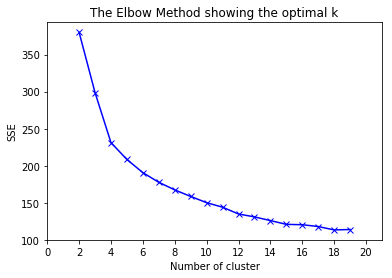

In [24]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(km_dataD)
    km_dataD["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
lx, ly=list(sse.keys()), list(sse.values())
ax, ay=[lx[i] for i in range(1,len(lx))], [ly[i] for i in range(1,len(ly))]
plt.figure()
plt.plot(ax, ay, 'bx-')
plt.xlim(2,21)
plt.xticks(np.arange(0,21,2))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method showing the optimal k')
plt.savefig('OUTPUTT/kmelbow.png', pad_inches=0.2)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=13, max_iter=100)

km_dataD =pd.DataFrame(wp_simD)
kmeans.fit(km_dataD)
km_dataD["clusters"] = kmeans.labels_
ssek = kmeans.inertia_
kmc=kmeans.cluster_centers_

# Getting Cluster And Data Point Nearer To Centroid Of Clusters Using Euclidean Distance
# 1 wup_similarity

In [26]:
vl=[]
vcv={}
vdv={}
km_clust={i:(' ',) for i in range(13)}
for er in km_dataD.index:
    cls=km_dataD["clusters"][er]
    km_clust[cls]=cluster_members(er, cls, km_clust)
    vv=wp_simD.loc[er].tolist()
    dds=euclidean(vv, kmc[cls].tolist())
    vl.append((cls, dds))
    if(cls in vdv.keys()):
        if(dds<vdv[cls]):
            vdv[cls]=dds
            vcv[cls]=er
    else:
        vdv[cls]=dds
        vcv[cls]=er
for k in km_clust.keys():
    km_clust[k]=km_clust[k][1:]
    
km_p1vl=[(len(km_clust[i]),km_clust[i],i,vcv[i]) for i in range(len(vcv))]    

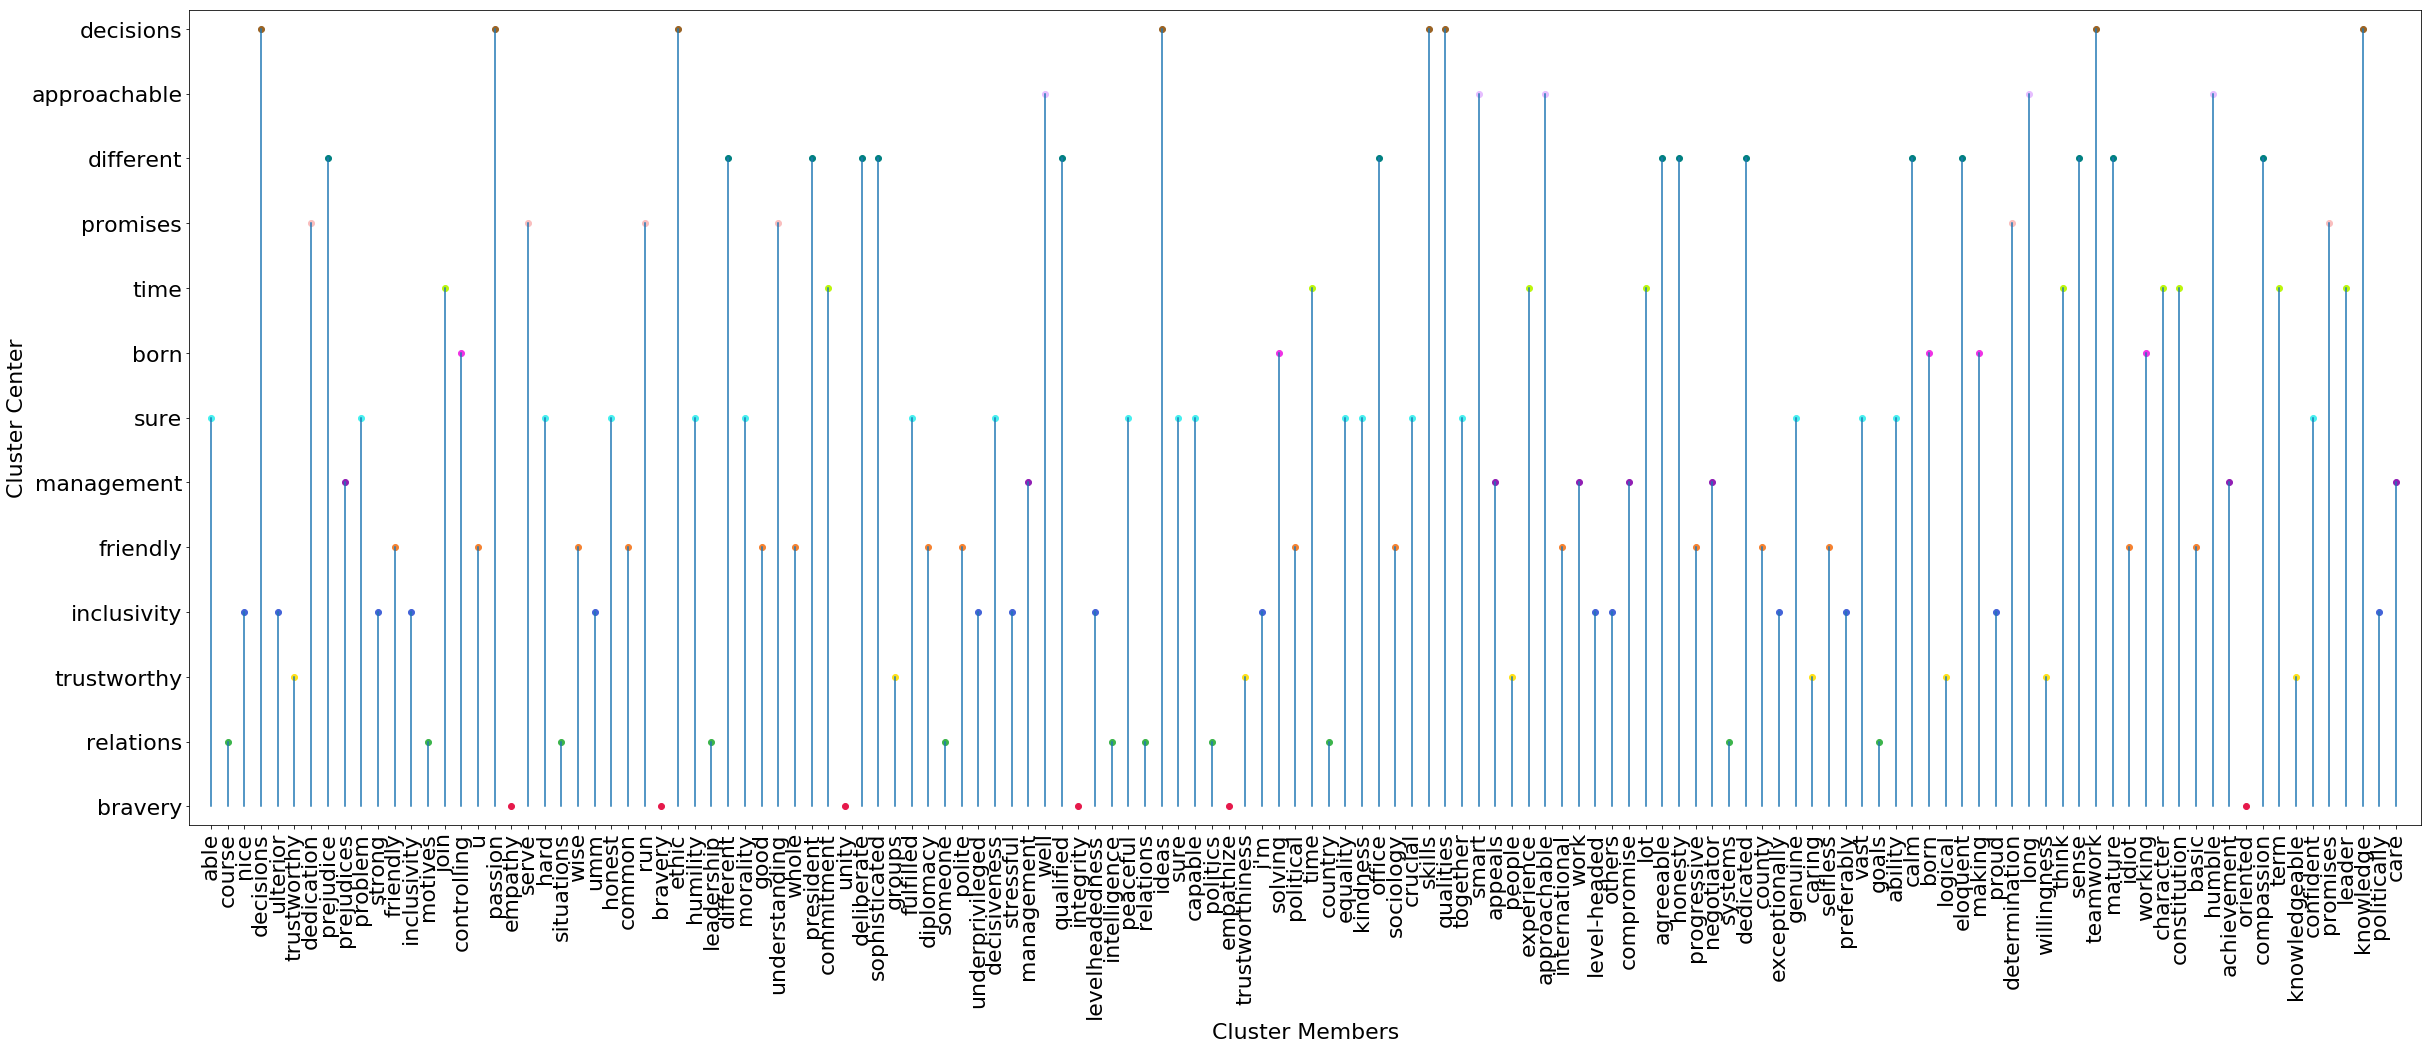

In [27]:
yc=[vcv[e] for e in (range(13))]
clr={0:'#e6194b', 1:'#3cb44b', 2:'#ffe119', 3:'#4363d8', 4:'#f58231', 5:'#911eb4', 6:'#46f0f0', 7:'#f032e6',
     8:'#bcf60c', 9:'#fabebe',10:'#008080',11:'#e6beff', 12:'#9a6324', 13:'#fffac8', 14:'#800000',15:'#aaffc3', 
     16:'#808000', 17:'#ffd8b1', 18:'#000075', 19:'#808080', 20:'#ffffff', 21:'#000000'}
plt.figure(figsize=(40,15))
for x,y  in zip(km_dataD.index, km_dataD['clusters']):
    plt.scatter(x, y , color=clr[y])
plt.stem(km_dataD.index, km_dataD['clusters'], markerfmt=' ', basefmt=" ")
plt.xticks(rotation='vertical',fontsize=22)
plt.yticks(np.arange(0,13,1),yc, rotation='horizontal',fontsize=22)
plt.margins(0.01,0.02)
plt.xlabel('Cluster Members', fontsize=22)
plt.ylabel('Cluster Center', fontsize=22)
plt.savefig('OUTPUTT/kmeclus.png', pad_inches=0.2)

In [28]:
#print(vcv)
km_p1cl=['size of cluster','cluster member','cluster ID', 'member nearer to centroid']
km_p1dat=pd.DataFrame(km_p1vl,columns=km_p1cl)
km_p1dat.sort_values(by=['size of cluster'],ascending=False, inplace=True)
km_p1dat.reset_index(drop=True,inplace=True)
km_p1dat['first match count'], km_p1dat['second match count']=match_count(km_p1dat['cluster member'])
km_p1dat.to_csv('OUTPUTT/kmWp1.csv',index_label='SN.')
km_p1dat

,size of cluster,cluster member,cluster ID,member nearer to centroid,first match count,second match count
0,19,"(able, problem, hard, honest, humility, morality, fulfilled, decisiveness, peaceful, sure, capable, equality, kindness, crucial, together, genuine, vast, ability, confident)",6,sure,"(6, (0, leadership, 17, 29))","(0, None)"
1,16,"(friendly, u, wise, common, good, whole, diplomacy, polite, political, sociology, international, progressive, county, selfless, idiot, basic)",4,friendly,"(4, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
2,15,"(nice, ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",3,inclusivity,"(4, (0, leadership, 17, 29))","(0, None)"
3,15,"(prejudice, different, president, deliberate, sophisticated, qualified, office, agreeable, honesty, dedicated, calm, eloquent, sense, mature, compassion)",10,different,"(4, (0, leadership, 17, 29))","(0, None)"
4,11,"(course, motives, situations, leadership, someone, intelligence, relations, politics, country, systems, goals)",1,relations,"(3, (3, political skills , 9, 16))","(2, (0, leadership, 17, 29))"
...,...,...,...,...,...,...
8,8,"(decisions, passion, ethic, ideas, skills, qualities, teamwork, knowledge)",12,decisions,"(2, (0, leadership, 17, 29))","(0, None)"
9,6,"(empathy, bravery, unity, integrity, empathize, oriented)",0,bravery,"(2, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
10,6,"(dedication, serve, run, understanding, determination, promises)",9,promises,"(1, (2, relate to diverse groups, 8, 17))","(0, None)"
11,5,"(controlling, solving, born, making, working)",7,born,"(3, (0, leadership, 17, 29))","(0, None)"


In [29]:
km_dataD1 =pd.DataFrame(wp_simD1)
kmeans.fit(km_dataD1)
km_dataD1["clusters"]=kmeans.labels_
ssek1=kmeans.inertia_
kmc1=kmeans.cluster_centers_

vl1=[]
vcv1={}
vdv1={}
km_clust1={i:(' ',) for i in range(13)}
for er in km_dataD1.index:
    cls=km_dataD1["clusters"][er]
    km_clust1[cls]=cluster_members(er, cls, km_clust1)
    vv=wp_simD1.loc[er].tolist()
    dds=euclidean(vv, kmc1[cls].tolist())
    vl1.append((cls, dds))
    if(cls in vdv1.keys()):
        if(dds<vdv1[cls]):
            vdv1[cls]=dds
            vcv1[cls]=er
    else:
        vdv1[cls]=dds
        vcv1[cls]=er
for k in km_clust1.keys():
    km_clust1[k]=km_clust1[k][1:]

km_p2vl=[(len(km_clust1[i]),km_clust1[i],i,vcv1[i]) for i in range(len(vcv1))]

In [30]:
km_p2dat=pd.DataFrame(km_p2vl,columns=km_p1cl)
km_p2dat.sort_values(by=['size of cluster'],ascending=False, inplace=True)
km_p2dat.reset_index(drop=True,inplace=True)
km_p2dat['first match count'], km_p2dat['second match count']=match_count(km_p2dat['cluster member'])
km_p2dat.to_csv('OUTPUTT/kmWp2.csv',index_label='SN.')
km_p2dat

,size of cluster,cluster member,cluster ID,member nearer to centroid,first match count,second match count
0,25,"(able, trustworthy, problem, hard, honest, humility, morality, polite, decisiveness, peaceful, sure, capable, trustworthiness, political, equality, kindness, crucial, together, genuine, selfless, vast, ability, logical, willingness, confident)",3,decisiveness,"(7, (0, leadership, 17, 29))","(0, None)"
1,14,"(ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",4,inclusivity,"(4, (0, leadership, 17, 29))","(0, None)"
2,13,"(course, decisions, motives, ethic, leadership, relations, ideas, skills, systems, goals, teamwork, term, knowledge)",0,motives,"(4, (0, leadership, 17, 29))","(0, None)"
3,13,"(nice, friendly, u, wise, common, good, whole, diplomacy, sociology, international, progressive, idiot, basic)",1,diplomacy,"(4, (1, diplomacy, 18, 22))","(0, None)"
4,11,"(join, commitment, groups, time, people, experience, lot, constitution, character, leader, care)",5,constitution,"(3, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
...,...,...,...,...,...,...
8,5,"(prejudices, management, appeals, compromise, achievement)",2,compromise,"(2, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
9,5,"(empathy, office, agreeable, calm, compassion)",10,calm,"(3, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
10,4,"(dedication, understanding, determination, promises)",7,promises,"(1, (3, political skills , 9, 16))","(0, None)"
11,2,"(run, work)",12,run,"(1, (1, diplomacy, 18, 22))","(0, None)"


In [31]:
km_dataD2 =pd.DataFrame(wp_simD2)
kmeans.fit(km_dataD2)
km_dataD2["clusters"] = kmeans.labels_
ssek2 = kmeans.inertia_
kmc2=kmeans.cluster_centers_

vl2=[]
vcv2={}
vdv2={}
km_clust2={i:(' ',) for i in range(13)}
for er in km_dataD2.index:
    cls=km_dataD2["clusters"][er]
    km_clust2[cls]=cluster_members(er, cls, km_clust2)
    vv=wp_simD2.loc[er].tolist()
    dds=euclidean(vv, kmc2[cls].tolist())
    vl2.append((cls, dds))
    if(cls in vdv2.keys()):
        if(dds<vdv2[cls]):
            vdv2[cls]=dds
            vcv2[cls]=er
    else:
        vdv2[cls]=dds
        vcv2[cls]=er
for k in km_clust2.keys():
    km_clust2[k]=km_clust2[k][1:]

km_p3vl=[(len(km_clust2[i]),km_clust2[i],i,vcv2[i]) for i in range(len(vcv2))]

In [32]:
km_p3dat=pd.DataFrame(km_p3vl,columns=km_p1cl)
km_p3dat.sort_values(by=['size of cluster'],ascending=False,inplace=True)
km_p3dat.reset_index(drop=True,inplace=True)
km_p3dat['first match count'], km_p3dat['second match count']=match_count(km_p3dat['cluster member'])
km_p3dat.to_csv('OUTPUTT/kmWp3.csv',index_label='SN.')
km_p3dat

,size of cluster,cluster member,cluster ID,member nearer to centroid,first match count,second match count
0,16,"(course, decisions, motives, passion, situations, ethic, leadership, relations, ideas, skills, qualities, systems, goals, teamwork, term, knowledge)",3,decisions,"(5, (0, leadership, 17, 29))","(0, None)"
1,15,"(problem, hard, morality, polite, decisiveness, peaceful, sure, capable, political, kindness, crucial, international, selfless, ability, confident)",12,sure,"(7, (0, leadership, 17, 29))","(0, None)"
2,11,"(join, commitment, groups, time, people, experience, lot, constitution, character, leader, care)",1,constitution,"(3, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
3,11,"(ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, proud)",6,inclusivity,"(4, (0, leadership, 17, 29))","(0, None)"
4,11,"(nice, u, wise, common, good, whole, diplomacy, sociology, progressive, idiot, basic)",10,diplomacy,"(4, (5, intelligence/knowledge, 9, 12))","(3, (1, diplomacy, 18, 22))"
...,...,...,...,...,...,...
8,7,"(empathy, bravery, unity, integrity, agreeable, calm, compassion)",11,compassion,"(3, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
9,5,"(management, appeals, work, compromise, achievement)",5,compromise,"(2, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
10,5,"(dedication, run, understanding, determination, promises)",9,promises,"(1, (3, political skills , 9, 16))","(0, None)"
11,4,"(someone, country, negotiator, county)",8,someone,"(1, (1, diplomacy, 18, 22))","(0, None)"


# Applying Hieraechy Clustering: Linkage Ward

In [33]:
hy_dataD=pd.DataFrame(wp_simD)
Z = linkage(hy_dataD, 'ward')
c, coph_dists = cophenet(Z, pdist(hy_dataD))

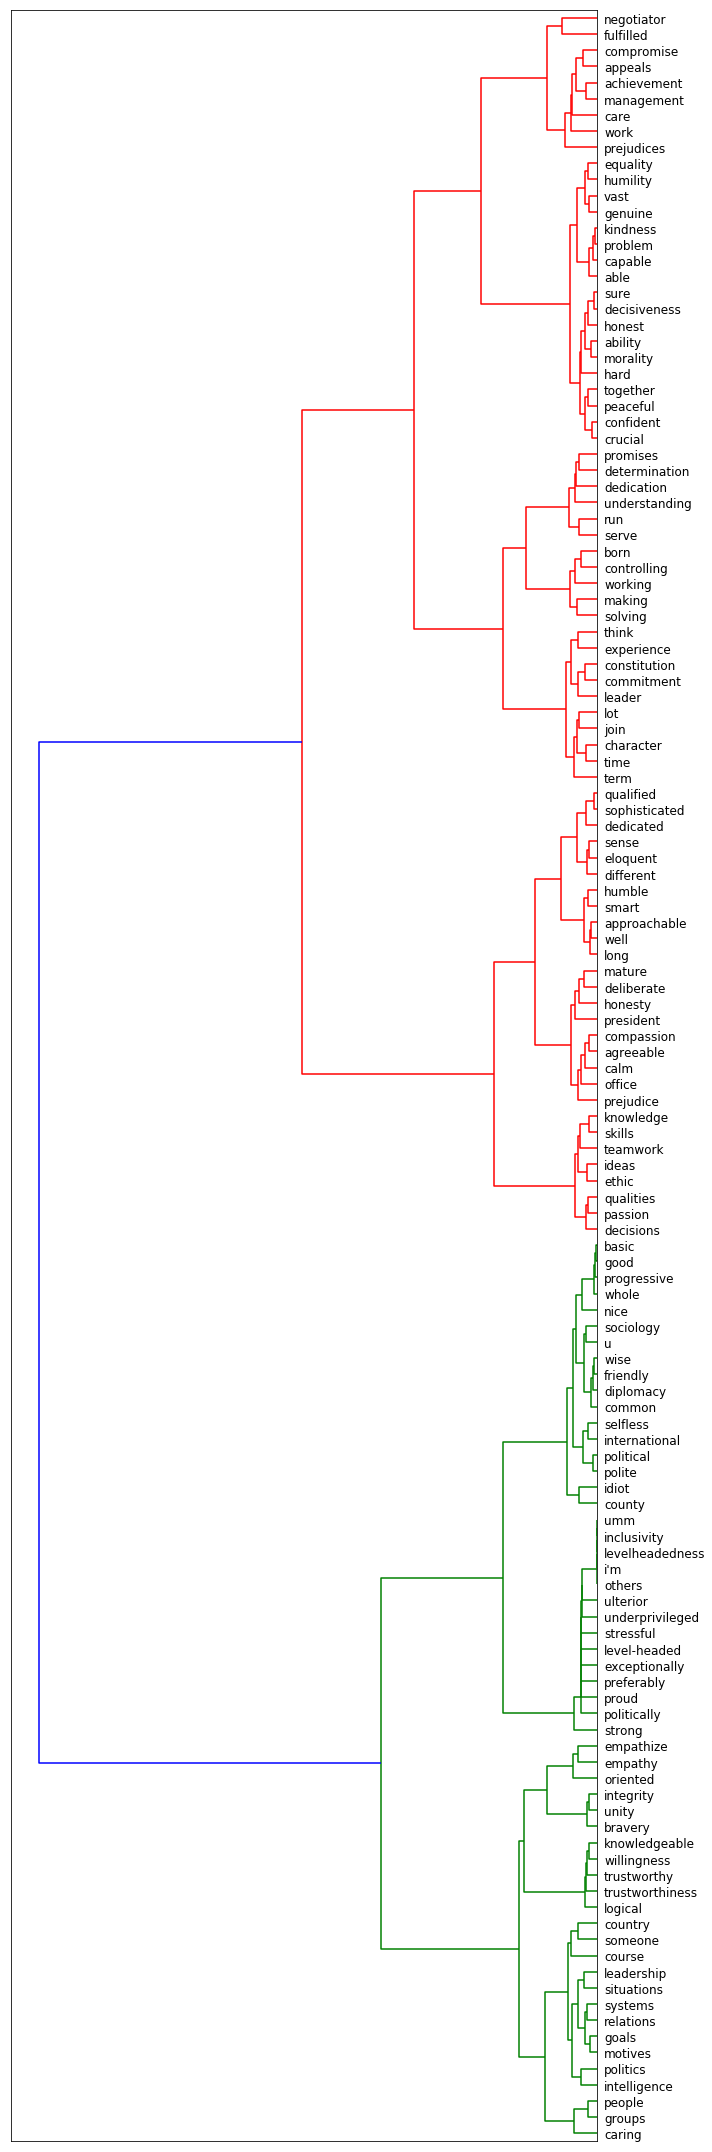

In [34]:
fig, ax = plt.subplots(figsize=(10, 30)) # set size
ax = dendrogram(Z, orientation="left", labels=hy_dataD.index,leaf_font_size=12)
plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tight_layout() #show plot with tight layout
plt.savefig('OUTPUTT/agghyd1.png', pad_inches=0.2)

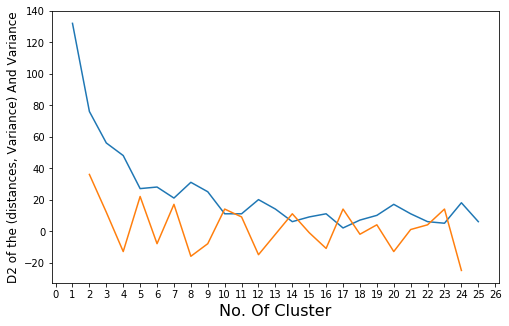

In [35]:
last = Z[-25:, 3]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.figure(figsize=(8, 5))
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xticks(np.arange(0,27,1))
plt.xlabel('No. Of Cluster', fontsize=16)
plt.ylabel('D2 of the (distances, Variance) And Variance', fontsize=12)
plt.savefig('OUTPUTT/aggelbow0.png', pad_inches=0.2)
plt.show()

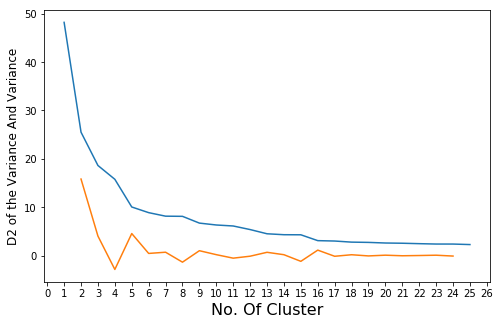

In [36]:
last = Z[-25:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.figure(figsize=(8, 5))
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xticks(np.arange(0,27,1))
plt.xlabel('No. Of Cluster', fontsize=16)
plt.ylabel('D2 of the Variance And Variance', fontsize=12)
plt.savefig('OUTPUTT/aggelbow10.png', pad_inches=0.2)
plt.show()

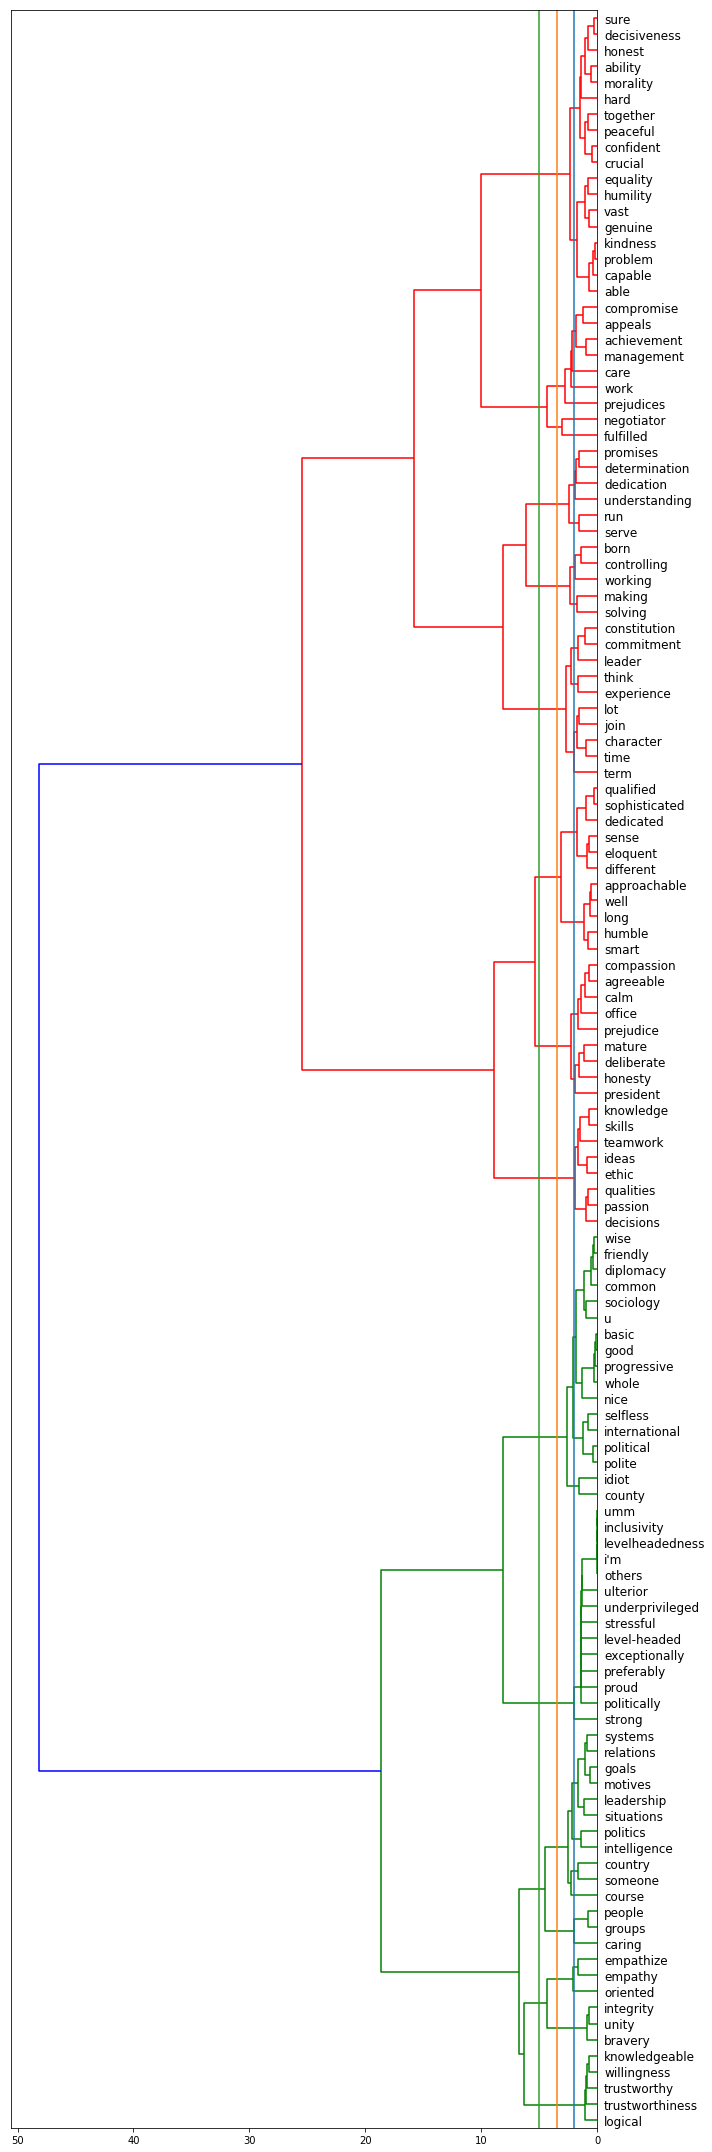

In [37]:
fig, ax = plt.subplots(figsize=(10, 30)) # set size
ax = dendrogram(Z, orientation="left", labels=hy_dataD.index,leaf_font_size=12,
                count_sort='ascending',distance_sort='ascending')
plt.plot([2,2], [0,2000])
plt.plot([3.5,3.5], [0,2000])
plt.plot([5,5], [0,2000])
plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)
plt.tight_layout() #show plot with tight layout
plt.savefig('OUTPUTT/aggehyd2.png', pad_inches=0.2)

# wup_similarity n_cluster=13

In [38]:
clustering=AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=13,
            pooling_func='deprecated')

In [39]:
clustering.fit(hy_dataD)
hy_clust={i:(' ',) for i in range(13)}
for i in range(len(hy_dataD.index)):
    er=hy_dataD.index[i]
    cls=clustering.labels_[i]
    hy_clust[cls]=cluster_members(er, cls, hy_clust)
for k in hy_clust.keys():
    hy_clust[k]=hy_clust[k][1:]
    
hy_pvl=[(len(hy_clust[i]),hy_clust[i],i) for i in range(13)]    

In [40]:
hy_pcl=['size of cluster','cluster member','cluster ID']
hy_pdat=pd.DataFrame(hy_pvl,columns=hy_pcl)
hy_pdat.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_pdat.reset_index(drop=True,inplace=True)
hy_pdat['first match count'], hy_pdat['second match count']=match_count(hy_pdat['cluster member'])
hy_pdat.to_csv('OUTPUTT/aghy13Wp0.csv',index_label='SN.')
hy_pdat

,size of cluster,cluster member,cluster ID,first match count,second match count
0,18,"(able, problem, hard, honest, humility, morality, decisiveness, peaceful, sure, capable, equality, kindness, crucial, together, genuine, vast, ability, confident)",11,"(6, (0, leadership, 17, 29))","(0, None)"
1,17,"(nice, friendly, u, wise, common, good, whole, diplomacy, polite, political, sociology, international, progressive, county, selfless, idiot, basic)",7,"(5, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
2,14,"(course, motives, situations, leadership, groups, someone, intelligence, relations, politics, country, people, systems, caring, goals)",0,"(3, (3, political skills , 9, 16))","(2, (0, leadership, 17, 29))"
3,14,"(ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",8,"(4, (0, leadership, 17, 29))","(0, None)"
4,11,"(different, sophisticated, well, qualified, smart, approachable, dedicated, eloquent, long, sense, humble)",4,"(2, (0, leadership, 17, 29))","(0, None)"
...,...,...,...,...,...
8,8,"(decisions, passion, ethic, ideas, skills, qualities, teamwork, knowledge)",6,"(2, (0, leadership, 17, 29))","(0, None)"
9,6,"(empathy, bravery, unity, integrity, empathize, oriented)",1,"(2, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
10,6,"(dedication, serve, run, understanding, determination, promises)",9,"(1, (2, relate to diverse groups, 8, 17))","(0, None)"
11,5,"(controlling, solving, born, making, working)",5,"(3, (0, leadership, 17, 29))","(0, None)"


In [41]:
hy_dataD1=pd.DataFrame(wp_simD1)
clustering.fit(hy_dataD1)

hy_clust1={i:(' ',) for i in range(13)}
for i in range(len(hy_dataD1.index)):
    er=hy_dataD1.index[i]
    cls=clustering.labels_[i]
    hy_clust1[cls]=cluster_members(er, cls, hy_clust1)
for k in hy_clust1.keys():
    hy_clust1[k]=hy_clust1[k][1:] 
 
hy_p1vl=[(len(hy_clust1[i]),hy_clust1[i],i) for i in range(13)]

In [42]:
hy_p1dat=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_p1dat.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_p1dat.reset_index(drop=True,inplace=True)
hy_p1dat['first match count'], hy_p1dat['second match count']=match_count(hy_p1dat['cluster member'])
hy_p1dat.to_csv('OUTPUTT/aghy13Wp1.csv',index_label='SN.')
hy_p1dat

,size of cluster,cluster member,cluster ID,first match count,second match count
0,25,"(able, trustworthy, problem, hard, honest, humility, morality, polite, decisiveness, peaceful, sure, capable, trustworthiness, political, equality, kindness, crucial, together, genuine, selfless, vast, ability, logical, willingness, confident)",1,"(7, (0, leadership, 17, 29))","(0, None)"
1,14,"(ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",8,"(4, (0, leadership, 17, 29))","(0, None)"
2,13,"(course, decisions, motives, ethic, leadership, relations, ideas, skills, systems, goals, teamwork, term, knowledge)",0,"(4, (0, leadership, 17, 29))","(0, None)"
3,13,"(nice, friendly, u, wise, common, good, whole, diplomacy, sociology, international, progressive, idiot, basic)",11,"(4, (1, diplomacy, 18, 22))","(0, None)"
4,11,"(join, commitment, groups, time, people, experience, lot, constitution, character, leader, care)",5,"(3, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
...,...,...,...,...,...
8,5,"(prejudices, management, appeals, compromise, achievement)",3,"(2, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
9,5,"(empathy, office, agreeable, calm, compassion)",4,"(3, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
10,4,"(dedication, understanding, determination, promises)",9,"(1, (3, political skills , 9, 16))","(0, None)"
11,2,"(run, work)",7,"(1, (1, diplomacy, 18, 22))","(0, None)"


In [43]:
hy_dataD2=pd.DataFrame(wp_simD2)
clustering.fit(hy_dataD2)

hy_clust2={i:(' ',) for i in range(13)}
for i in range(len(hy_dataD2.index)):
    er=hy_dataD2.index[i]
    cls=clustering.labels_[i]
    hy_clust2[cls]=cluster_members(er, cls, hy_clust2)
for k in hy_clust2.keys():
    hy_clust2[k]=hy_clust2[k][1:] 
 
hy_p2vl=[(len(hy_clust2[i]),hy_clust2[i],i) for i in range(13)]

In [44]:
hy_p2dat=pd.DataFrame(hy_p2vl,columns=hy_pcl)
hy_p2dat.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_p2dat.reset_index(drop=True,inplace=True)
hy_p2dat['first match count'], hy_p2dat['second match count']=match_count(hy_p2dat['cluster member'])
hy_p2dat.to_csv('OUTPUTT/aghy13Wp2.csv',index_label='SN.')
hy_p2dat

,size of cluster,cluster member,cluster ID,first match count,second match count
0,16,"(course, decisions, motives, passion, situations, ethic, leadership, relations, ideas, skills, qualities, systems, goals, teamwork, term, knowledge)",0,"(5, (0, leadership, 17, 29))","(0, None)"
1,15,"(problem, hard, morality, polite, decisiveness, peaceful, sure, capable, political, kindness, crucial, international, selfless, ability, confident)",4,"(7, (0, leadership, 17, 29))","(0, None)"
2,11,"(join, commitment, groups, time, people, experience, lot, constitution, character, leader, care)",2,"(3, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
3,11,"(ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, proud)",7,"(4, (0, leadership, 17, 29))","(0, None)"
4,11,"(nice, u, wise, common, good, whole, diplomacy, sociology, progressive, idiot, basic)",9,"(4, (5, intelligence/knowledge, 9, 12))","(3, (1, diplomacy, 18, 22))"
...,...,...,...,...,...
8,7,"(empathy, bravery, unity, integrity, agreeable, calm, compassion)",1,"(3, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
9,5,"(dedication, run, understanding, determination, promises)",3,"(1, (3, political skills , 9, 16))","(0, None)"
10,5,"(management, appeals, work, compromise, achievement)",10,"(2, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
11,4,"(someone, country, negotiator, county)",6,"(1, (1, diplomacy, 18, 22))","(0, None)"


# path similarity n_cluster=13

In [45]:
hy_dataD3=pd.DataFrame(ph_simD)
clustering.fit(hy_dataD3)

hy_clust3={i:(' ',) for i in range(13)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(13)]

In [46]:
hy_pdat3=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat3.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_pdat3.reset_index(drop=True,inplace=True)
hy_pdat3['first match count'], hy_pdat3['second match count']=match_count(hy_pdat3['cluster member'])
hy_pdat3.to_csv('OUTPUTT/aghy13pt3.csv',index_label='SN.')
hy_pdat3

,size of cluster,cluster member,cluster ID,first match count,second match count
0,36,"(able, nice, prejudice, problem, friendly, u, wise, honest, common, humility, morality, good, whole, diplomacy, polite, decisiveness, peaceful, sure, capable, political, equality, kindness, sociology, crucial, together, international, progressive, genuine, selfless, vast, ability, logical, willingness, basic, knowledgeable, confident)",4,"(9, (1, diplomacy, 18, 22))","(7, (0, leadership, 17, 29))"
1,18,"(decisions, motives, ethic, leadership, someone, intelligence, relations, ideas, politics, country, skills, negotiator, systems, county, goals, teamwork, idiot, knowledge)",0,"(4, (5, intelligence/knowledge, 9, 12))","(3, (0, leadership, 17, 29))"
2,17,"(different, president, deliberate, sophisticated, well, qualified, smart, approachable, agreeable, dedicated, calm, eloquent, long, sense, mature, humble, compassion)",6,"(5, (0, leadership, 17, 29))","(0, None)"
3,13,"(ulterior, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",9,"(3, (0, leadership, 17, 29))","(0, None)"
4,11,"(dedication, prejudices, empathy, serve, fulfilled, empathize, appeals, compromise, achievement, oriented, promises)",2,"(4, (2, relate to diverse groups, 8, 17))","(2, (0, leadership, 17, 29))"
...,...,...,...,...,...
8,3,"(solving, making, working)",7,"(2, (0, leadership, 17, 29))","(0, None)"
9,2,"(think, leader)",8,"(0, None)","(0, None)"
10,2,"(strong, hard)",10,"(1, (0, leadership, 17, 29))","(0, None)"
11,2,"(management, care)",11,"(1, (1, diplomacy, 18, 22))","(0, None)"


In [47]:
hy_dataD3=pd.DataFrame(ph_simD1)
clustering.fit(hy_dataD3)

hy_clust3={i:(' ',) for i in range(13)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(13)]

In [48]:
hy_pdat4=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat4.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_pdat4.reset_index(drop=True,inplace=True)
hy_pdat4['first match count'], hy_pdat4['second match count']=match_count(hy_pdat4['cluster member'])
hy_pdat4.to_csv('OUTPUTT/aghy13pt4.csv',index_label='SN.')
hy_pdat4

,size of cluster,cluster member,cluster ID,first match count,second match count
0,35,"(able, nice, prejudice, problem, friendly, u, wise, honest, common, humility, morality, good, whole, diplomacy, polite, decisiveness, peaceful, sure, capable, political, equality, kindness, sociology, crucial, together, international, progressive, genuine, selfless, vast, ability, logical, willingness, basic, confident)",8,"(9, (1, diplomacy, 18, 22))","(7, (0, leadership, 17, 29))"
1,16,"(course, different, president, sophisticated, well, smart, approachable, lot, agreeable, calm, eloquent, long, sense, humble, compassion, term)",2,"(4, (0, leadership, 17, 29))","(0, None)"
2,13,"(ulterior, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",4,"(3, (0, leadership, 17, 29))","(0, None)"
3,13,"(decisions, passion, situations, bravery, deliberate, intelligence, politics, country, office, honesty, county, teamwork, mature)",11,"(4, (0, leadership, 17, 29))","(0, None)"
4,10,"(join, commitment, groups, time, qualities, people, experience, constitution, character, leader)",1,"(3, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
...,...,...,...,...,...
8,4,"(run, understanding, work, determination)",3,"(1, (1, diplomacy, 18, 22))","(0, None)"
9,2,"(management, care)",6,"(1, (1, diplomacy, 18, 22))","(0, None)"
10,2,"(unity, integrity)",7,"(1, (2, relate to diverse groups, 8, 17))","(0, None)"
11,2,"(strong, hard)",9,"(1, (0, leadership, 17, 29))","(0, None)"


In [49]:
hy_dataD3=pd.DataFrame(ph_simD2)
clustering.fit(hy_dataD3)

hy_clust3={i:(' ',) for i in range(13)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(13)]

In [50]:
hy_pdat5=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat5.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_pdat5.reset_index(drop=True,inplace=True)
hy_pdat5['first match count'], hy_pdat5['second match count']=match_count(hy_pdat5['cluster member'])
hy_pdat5.to_csv('OUTPUTT/aghy13pt5.csv',index_label='SN.')
hy_pdat5

,size of cluster,cluster member,cluster ID,first match count,second match count
0,32,"(able, nice, problem, u, wise, honest, common, humility, morality, good, whole, diplomacy, polite, decisiveness, peaceful, sure, capable, political, equality, kindness, sociology, crucial, international, progressive, genuine, selfless, vast, ability, logical, willingness, basic, confident)",10,"(8, (1, diplomacy, 18, 22))","(7, (0, leadership, 17, 29))"
1,17,"(decisions, passion, situations, bravery, leadership, president, deliberate, someone, intelligence, relations, politics, country, office, honesty, county, teamwork, mature)",0,"(5, (0, leadership, 17, 29))","(0, None)"
2,14,"(prejudice, different, sophisticated, smart, approachable, agreeable, negotiator, calm, eloquent, long, sense, idiot, humble, compassion)",4,"(5, (1, diplomacy, 18, 22))","(3, (0, leadership, 17, 29))"
3,10,"(ulterior, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, proud)",7,"(3, (0, leadership, 17, 29))","(0, None)"
4,8,"(course, groups, time, qualities, people, lot, character, term)",1,"(2, (0, leadership, 17, 29))","(0, None)"
...,...,...,...,...,...
8,4,"(run, understanding, work, determination)",3,"(1, (1, diplomacy, 18, 22))","(0, None)"
9,2,"(unity, integrity)",6,"(1, (2, relate to diverse groups, 8, 17))","(0, None)"
10,2,"(strong, hard)",8,"(1, (0, leadership, 17, 29))","(0, None)"
11,2,"(trustworthy, trustworthiness)",9,"(2, (6, honesty, 7, 10))","(0, None)"


# wup_similarity n_cluster=10

In [51]:
clustering=AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func='deprecated')

In [52]:
hy_dataD3=pd.DataFrame(wp_simD)
clustering.fit(hy_dataD3)

hy_clust3={i:('',) for i in range(10)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(10)]

In [53]:
hy_pdat6=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat6.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_pdat6.reset_index(drop=True,inplace=True)
hy_pdat6['first match count'], hy_pdat6['second match count']=match_count(hy_pdat6['cluster member'])
hy_pdat6.to_csv('OUTPUTT/aghy10wp6.csv',index_label='SN.')
hy_pdat6

,size of cluster,cluster member,cluster ID,first match count,second match count
0,20,"(prejudice, different, president, deliberate, sophisticated, well, qualified, office, smart, approachable, agreeable, honesty, dedicated, calm, eloquent, long, sense, mature, humble, compassion)",4,"(5, (0, leadership, 17, 29))","(0, None)"
1,18,"(able, problem, hard, honest, humility, morality, decisiveness, peaceful, sure, capable, equality, kindness, crucial, together, genuine, vast, ability, confident)",5,"(6, (0, leadership, 17, 29))","(0, None)"
2,17,"(nice, friendly, u, wise, common, good, whole, diplomacy, polite, political, sociology, international, progressive, county, selfless, idiot, basic)",7,"(5, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
3,14,"(ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",8,"(4, (0, leadership, 17, 29))","(0, None)"
4,14,"(course, motives, situations, leadership, groups, someone, intelligence, relations, politics, country, people, systems, caring, goals)",9,"(3, (3, political skills , 9, 16))","(2, (0, leadership, 17, 29))"
5,11,"(trustworthy, empathy, bravery, unity, integrity, empathize, trustworthiness, logical, willingness, oriented, knowledgeable)",0,"(3, (6, honesty, 7, 10))","(2, (1, diplomacy, 18, 22))"
6,11,"(dedication, controlling, serve, run, understanding, solving, born, making, determination, working, promises)",1,"(3, (0, leadership, 17, 29))","(0, None)"
7,10,"(join, commitment, time, experience, lot, think, character, constitution, term, leader)",3,"(2, (0, leadership, 17, 29))","(0, None)"
8,9,"(prejudices, fulfilled, management, appeals, work, compromise, negotiator, achievement, care)",2,"(4, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
9,8,"(decisions, passion, ethic, ideas, skills, qualities, teamwork, knowledge)",6,"(2, (0, leadership, 17, 29))","(0, None)"


In [54]:
hy_dataD3=pd.DataFrame(wp_simD1)
clustering.fit(hy_dataD3)

hy_clust3={i:('',) for i in range(10)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(10)]

In [55]:
hy_pdat7=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat7.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_pdat7.reset_index(drop=True,inplace=True)
hy_pdat7['first match count'], hy_pdat7['second match count']=match_count(hy_pdat7['cluster member'])
hy_pdat7.to_csv('OUTPUTT/aghy10wp7.csv',index_label='SN.')
hy_pdat7

,size of cluster,cluster member,cluster ID,first match count,second match count
0,25,"(able, trustworthy, problem, hard, honest, humility, morality, polite, decisiveness, peaceful, sure, capable, trustworthiness, political, equality, kindness, crucial, together, genuine, selfless, vast, ability, logical, willingness, confident)",4,"(7, (0, leadership, 17, 29))","(0, None)"
1,22,"(prejudice, passion, empathy, situations, bravery, president, unity, deliberate, someone, integrity, intelligence, politics, country, office, qualities, agreeable, honesty, negotiator, county, calm, mature, compassion)",0,"(4, (0, leadership, 17, 29))","(0, None)"
2,14,"(ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",8,"(4, (0, leadership, 17, 29))","(0, None)"
3,13,"(course, decisions, motives, ethic, leadership, relations, ideas, skills, systems, goals, teamwork, term, knowledge)",1,"(4, (0, leadership, 17, 29))","(0, None)"
4,13,"(nice, friendly, u, wise, common, good, whole, diplomacy, sociology, international, progressive, idiot, basic)",5,"(4, (1, diplomacy, 18, 22))","(0, None)"
5,11,"(join, commitment, groups, time, people, experience, lot, constitution, character, leader, care)",2,"(3, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
6,9,"(different, sophisticated, well, smart, approachable, eloquent, long, sense, humble)",6,"(2, (0, leadership, 17, 29))","(0, None)"
7,5,"(prejudices, management, appeals, compromise, achievement)",3,"(2, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
8,4,"(dedication, understanding, determination, promises)",9,"(1, (3, political skills , 9, 16))","(0, None)"
9,2,"(run, work)",7,"(1, (1, diplomacy, 18, 22))","(0, None)"


In [56]:
hy_dataD3=pd.DataFrame(wp_simD2)
clustering.fit(hy_dataD3)

hy_clust3={i:('',) for i in range(10)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(10)]

In [57]:
hy_pdat8=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat8.sort_values(by=['size of cluster'],ascending=False, inplace=True)
hy_pdat8.reset_index(drop=True,inplace=True)
hy_pdat8['first match count'], hy_pdat8['second match count']=match_count(hy_pdat8['cluster member'])
hy_pdat8.to_csv('OUTPUTT/aghy10wp8.csv',index_label='SN.')
hy_pdat8

,size of cluster,cluster member,cluster ID,first match count,second match count
0,24,"(course, decisions, prejudice, motives, passion, situations, ethic, leadership, president, deliberate, intelligence, relations, ideas, politics, office, skills, qualities, honesty, systems, goals, teamwork, mature, term, knowledge)",1,"(7, (0, leadership, 17, 29))","(0, None)"
1,22,"(problem, empathy, hard, bravery, morality, unity, polite, decisiveness, integrity, peaceful, sure, capable, political, kindness, crucial, international, agreeable, selfless, ability, calm, compassion, confident)",0,"(8, (0, leadership, 17, 29))","(0, None)"
2,11,"(join, commitment, groups, time, people, experience, lot, constitution, character, leader, care)",2,"(3, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
3,11,"(ulterior, strong, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, proud)",7,"(4, (0, leadership, 17, 29))","(0, None)"
4,11,"(nice, u, wise, common, good, whole, diplomacy, sociology, progressive, idiot, basic)",9,"(4, (5, intelligence/knowledge, 9, 12))","(3, (1, diplomacy, 18, 22))"
5,10,"(able, trustworthy, honest, humility, trustworthiness, equality, genuine, vast, logical, willingness)",8,"(3, (1, diplomacy, 18, 22))","(0, None)"
6,8,"(different, sophisticated, smart, approachable, eloquent, long, sense, humble)",5,"(2, (0, leadership, 17, 29))","(0, None)"
7,6,"(prejudices, management, appeals, work, compromise, achievement)",4,"(2, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
8,5,"(dedication, run, understanding, determination, promises)",3,"(1, (3, political skills , 9, 16))","(0, None)"
9,4,"(someone, country, negotiator, county)",6,"(1, (1, diplomacy, 18, 22))","(0, None)"


# path_similarity n_cluster=10

In [58]:
hy_dataD3=pd.DataFrame(ph_simD)
clustering.fit(hy_dataD3)

hy_clust3={i:('',) for i in range(10)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(10)]

In [59]:
hy_pdat9=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat9.sort_values(by=['size of cluster'],ascending=False, inplace=True)
hy_pdat9.reset_index(drop=True,inplace=True)
hy_pdat9['first match count'], hy_pdat9['second match count']=match_count(hy_pdat9['cluster member'])
hy_pdat9.to_csv('OUTPUTT/aghy10pt9.csv',index_label='SN.')
hy_pdat9

,size of cluster,cluster member,cluster ID,first match count,second match count
0,38,"(able, nice, trustworthy, prejudice, problem, friendly, u, wise, honest, common, humility, morality, good, whole, diplomacy, polite, decisiveness, peaceful, sure, capable, trustworthiness, political, equality, kindness, sociology, crucial, together, international, progressive, genuine, selfless, vast, ability, logical, willingness, basic, knowledgeable, confident)",4,"(9, (1, diplomacy, 18, 22))","(7, (0, leadership, 17, 29))"
1,18,"(decisions, motives, ethic, leadership, someone, intelligence, relations, ideas, politics, country, skills, negotiator, systems, county, goals, teamwork, idiot, knowledge)",3,"(4, (5, intelligence/knowledge, 9, 12))","(3, (0, leadership, 17, 29))"
2,17,"(different, president, deliberate, sophisticated, well, qualified, smart, approachable, agreeable, dedicated, calm, eloquent, long, sense, mature, humble, compassion)",6,"(5, (0, leadership, 17, 29))","(0, None)"
3,15,"(ulterior, strong, inclusivity, hard, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",0,"(4, (0, leadership, 17, 29))","(0, None)"
4,11,"(dedication, prejudices, empathy, serve, fulfilled, empathize, appeals, compromise, achievement, oriented, promises)",2,"(4, (2, relate to diverse groups, 8, 17))","(2, (0, leadership, 17, 29))"
5,11,"(course, join, commitment, groups, time, people, experience, lot, caring, constitution, term)",8,"(3, (2, relate to diverse groups, 8, 17))","(2, (0, leadership, 17, 29))"
6,9,"(passion, situations, bravery, unity, integrity, office, qualities, honesty, character)",9,"(2, (6, honesty, 7, 10))","(1, (0, leadership, 17, 29))"
7,6,"(controlling, run, understanding, work, born, determination)",5,"(1, (0, leadership, 17, 29))","(0, None)"
8,4,"(management, think, leader, care)",1,"(1, (1, diplomacy, 18, 22))","(0, None)"
9,3,"(solving, making, working)",7,"(2, (0, leadership, 17, 29))","(0, None)"


In [60]:
hy_dataD3=pd.DataFrame(ph_simD1)
clustering.fit(hy_dataD3)

hy_clust3={i:('',) for i in range(10)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(10)]

In [61]:
hy_pdat10=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat10.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_pdat10.reset_index(drop=True,inplace=True)
hy_pdat10['first match count'], hy_pdat10['second match count']=match_count(hy_pdat10['cluster member'])
hy_pdat10.to_csv('OUTPUTT/aghy10pt10.csv',index_label='SN.')
hy_pdat10

,size of cluster,cluster member,cluster ID,first match count,second match count
0,37,"(able, nice, trustworthy, prejudice, problem, friendly, u, wise, honest, common, humility, morality, good, whole, diplomacy, polite, decisiveness, peaceful, sure, capable, trustworthiness, political, equality, kindness, sociology, crucial, together, international, progressive, genuine, selfless, vast, ability, logical, willingness, basic, confident)",0,"(9, (1, diplomacy, 18, 22))","(7, (0, leadership, 17, 29))"
1,25,"(decisions, motives, passion, situations, bravery, ethic, leadership, deliberate, someone, intelligence, relations, ideas, politics, country, office, skills, honesty, negotiator, systems, county, goals, teamwork, mature, idiot, knowledge)",1,"(6, (0, leadership, 17, 29))","(0, None)"
2,16,"(course, different, president, sophisticated, well, smart, approachable, lot, agreeable, calm, eloquent, long, sense, humble, compassion, term)",5,"(4, (0, leadership, 17, 29))","(0, None)"
3,13,"(ulterior, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, exceptionally, preferably, proud, politically)",4,"(3, (0, leadership, 17, 29))","(0, None)"
4,10,"(join, commitment, groups, time, qualities, people, experience, constitution, character, leader)",3,"(3, (2, relate to diverse groups, 8, 17))","(1, (0, leadership, 17, 29))"
5,7,"(dedication, prejudices, empathy, appeals, compromise, achievement, promises)",2,"(2, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
6,4,"(run, understanding, work, determination)",8,"(1, (1, diplomacy, 18, 22))","(0, None)"
7,2,"(management, care)",6,"(1, (1, diplomacy, 18, 22))","(0, None)"
8,2,"(unity, integrity)",7,"(1, (2, relate to diverse groups, 8, 17))","(0, None)"
9,2,"(strong, hard)",9,"(1, (0, leadership, 17, 29))","(0, None)"


In [62]:
hy_dataD3=pd.DataFrame(ph_simD2)
clustering.fit(hy_dataD3)

hy_clust3={i:('',) for i in range(10)}
for i in range(len(hy_dataD3.index)):
    er=hy_dataD3.index[i]
    cls=clustering.labels_[i]
    hy_clust3[cls]=cluster_members(er, cls, hy_clust3)
for k in hy_clust3.keys():
    hy_clust3[k]=hy_clust3[k][1:] 
 
hy_p1vl=[(len(hy_clust3[i]),hy_clust3[i],i) for i in range(10)]

In [63]:
hy_pdat11=pd.DataFrame(hy_p1vl,columns=hy_pcl)
hy_pdat11.sort_values(by=['size of cluster'],ascending=False,inplace=True)
hy_pdat11.reset_index(drop=True,inplace=True)
hy_pdat11['first match count'], hy_pdat11['second match count']=match_count(hy_pdat11['cluster member'])
hy_pdat11.to_csv('OUTPUTT/aghy10pt11.csv',index_label='SN.')
hy_pdat11

,size of cluster,cluster member,cluster ID,first match count,second match count
0,46,"(able, nice, prejudice, problem, u, wise, honest, common, humility, different, morality, good, whole, sophisticated, diplomacy, polite, decisiveness, peaceful, sure, capable, political, equality, kindness, sociology, crucial, smart, approachable, international, agreeable, progressive, negotiator, genuine, selfless, vast, ability, calm, logical, eloquent, long, willingness, sense, idiot, basic, humble, compassion, confident)",0,"(13, (1, diplomacy, 18, 22))","(10, (0, leadership, 17, 29))"
1,24,"(decisions, motives, passion, situations, bravery, ethic, leadership, president, deliberate, someone, intelligence, relations, ideas, politics, country, office, skills, honesty, systems, county, goals, teamwork, mature, knowledge)",1,"(6, (0, leadership, 17, 29))","(0, None)"
2,13,"(course, join, commitment, groups, time, qualities, people, experience, lot, constitution, character, term, leader)",4,"(3, (2, relate to diverse groups, 8, 17))","(2, (0, leadership, 17, 29))"
3,10,"(ulterior, inclusivity, umm, underprivileged, stressful, levelheadedness, i'm, level-headed, others, proud)",7,"(3, (0, leadership, 17, 29))","(0, None)"
4,7,"(dedication, prejudices, empathy, appeals, compromise, achievement, promises)",2,"(2, (1, diplomacy, 18, 22))","(1, (0, leadership, 17, 29))"
5,4,"(run, understanding, work, determination)",3,"(1, (1, diplomacy, 18, 22))","(0, None)"
6,2,"(management, care)",5,"(1, (1, diplomacy, 18, 22))","(0, None)"
7,2,"(unity, integrity)",6,"(1, (2, relate to diverse groups, 8, 17))","(0, None)"
8,2,"(strong, hard)",8,"(1, (0, leadership, 17, 29))","(0, None)"
9,2,"(trustworthy, trustworthiness)",9,"(2, (6, honesty, 7, 10))","(0, None)"


# Applying self p&c of avaliabels direct thresholding on similarity score

In [64]:
#vcus, vcus1, vcus2=set(Vcub), set(Vcub1), set(Vcub2)
#a_synset(e)
syn_vcus, syn_vcus1, syn_vcus2=[], [], []
for w in vcus:
    syn_vcus.append((w, a_synset(w)))
for w in vcus1:
    syn_vcus1.append((w, a_synset(w)))
for w in vcus2:
    syn_vcus2.append((w, a_synset(w)))
print(len(syn_vcus),len(syn_vcus1),len(syn_vcus2)) 
print(len(vcus),len(vcus1),len(vcus2)) 

132 118 112
132 118 112


#  1 wup_similariry

In [104]:
def mergeC_WP(clust1, clust2):
    synr=[]
    sync=[]
    for w1 in clust1:
        synr.extend(a_synset(w1))
    for w2 in clust2:
        sync.extend(a_synset(w2))
    
    siml=[]
    mx=0
    mx_mrc=None
    for er in synr:
        for ec in sync:
            sc=wn.wup_similarity(er, ec)
            siml.append(sc)
            if(sc!=None):
                if(mx<sc):
                    mx=sc
                    mx_mrc=((er,er.definition()),(ec,ec.definition()))
    cntl=len(siml)
    if(cntl>0):
        if(None not in siml):
            #print(max(siml),'1111111\n')
            return(sum(siml)/cntl,mx,mx_mrc)
        if(None in siml):
            siml=[el for el in siml if(el!=None)]
            if(siml!=[]):
                #print(max(siml),'222222\n')
                if(cntl<=1.4*len(siml)):
                    return(sum(siml)/len(siml),mx, mx_mrc)
                if(1.4*len(siml)<cntl<=2*len(siml)):
                    return(sum(siml)/cntl,mx, mx_mrc)
                if(2*len(siml)<cntl):
                    return(sum(siml)/(cntl+len(siml)),mx, mx_mrc)
            if(siml==[]):
                return(0,mx, mx_mrc)
    if(cntl==0):
        return(0,mx, mx_mrc)

In [114]:
def merge_info_wp(clIn, j, lk,lu):
    mxxl, avggl=[], []
    indl, avgl, mxl, real=j, 0, 0, None
    for i in range(j+1, len(clIn)):
        avg, mx, rea=mergeC_WP(clIn[j], clIn[i])
        if(avg>0):
            avggl.append(avg)
        if(mx>0):    
            mxxl.append(mx)
        if(avg>=lk):
            if(mx>=lu):
                avgl=avg
                mxl=mx
                real=rea
                indl=i
    if(indl>j):
        clIn[j].extend(clIn[indl])
        del(clIn[indl])
        if(avggl!=[]):
            return(clIn, j, real, min(mxxl), min(avggl))
        if(avggl==[]):
            return(clIn, j, real, 0, 0)
    if(indl==j):
        if(avggl!=[]):
            return(clIn, j+1, 'NAN', min(mxxl), min(avggl))
        if(avggl==[]):
            return(clIn, j+1, 'NAN', 0, 0)

In [115]:
def clustering_WP(clusIn, lk, lu):
    maxxl=[]
    avggl=[]
    mergeinfo=[]
    i, j=0, 0
    while(j<len(clusIn)):
        jo=j
        clusIn, j, real, maxx, avgg=merge_info_wp(clusIn, j, lk, lu)
        maxxl.append(maxx)
        avggl.append(avgg)
        if(jo==j):
            mergeinfo.append([])
            mergeinfo[i].append(real)
            i+=1
    print(i,j)
    return(maxxl,avggl,mergeinfo, clusIn)   

# Compute Result of wup_similarity  thresholding

In [148]:
clusterIn=[[e] for e in vcus]
k=[0.45, 0.40, 0.35, 0.3, 0.25, 0.2]
u=[0.8, 0.75, 0.7, 0.65, 0.6, 0.55]
obj1=[]
for i in range(6):
    lk, lu=k[i], u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj1.append(pd.DataFrame(obj))
    obj1[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj1[i].reset_index(drop=True,inplace=True)
    mgrsn=['NA' for i in range(obj1[i].shape[0])]
    for j in range(len(mergeinfo)):
        mgrsn[j]=mergeinfo[j]
    obj1[i]['merge reason']=mgrsn
    obj1[i]['first match count'], obj1[i]['second match count']=match_count(obj1[i]['cluster member'])
    name='OUTPUTT/hywppt'+str(i)+'.csv'
    obj1[i].to_csv(name,index_label='SN.')

5 127
6 121
5 116
15 101
33 68
15 53


In [149]:
#obj
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)

0.2836665209070053 0.051657634130020114
1.0 0.28122890997891004


53

In [151]:
[print(e.shape) for e in obj1]

(127, 5)
(121, 5)
(116, 5)
(101, 5)
(68, 5)
(53, 5)


[None, None, None, None, None, None]

In [152]:
obj1[0]

,size of cluster,cluster member,merge reason,first match count,second match count
0,3,"[intelligence, knowledge, skills]","[((Synset('leader.n.01'), a person who rules or guides or inspires others), (Synset('person.n.01'), a human being))]","(2, (5, intelligence/knowledge, 9, 12))","(1, (0, leadership, 17, 29))"
1,2,"[country, county, lot]","[((Synset('integrity.n.01'), an undivided or unbroken completeness or totality with nothing wanting), (Synset('integrity.n.01'), an undivided or unbroken completeness or totality with nothing wanting))]","(1, (2, relate to diverse groups, 8, 17))","(0, None)"
2,2,"[leadership, someone, politics, honesty]","[((Synset('intelligence.n.01'), the ability to comprehend; to understand and profit from experience), (Synset('cognition.n.01'), the psychological result of perception and learning and reasoning))]","(1, (0, leadership, 17, 29))","(0, None)"
3,2,"[unity, integrity]","[((Synset('intelligence.n.01'), the ability to comprehend; to understand and profit from experience), (Synset('skill.n.01'), an ability that has been acquired by training))]","(1, (2, relate to diverse groups, 8, 17))","(0, None)"
4,1,"[negotiator, idiot]","[((Synset('country.n.02'), the territory occupied by a nation), (Synset('county.n.02'), (United States) the largest administrative district within a state))]","(1, (1, diplomacy, 18, 22))","(0, None)"
...,...,...,...,...,...
122,1,"[commitment, teamwork, knowledgeable]",NA,"(1, (4, determination, 8, 13))","(0, None)"
123,1,[president],NA,"(0, None)","(0, None)"
124,1,[whole],NA,"(1, (2, relate to diverse groups, 8, 17))","(0, None)"
125,1,"[understanding, sense]",NA,"(1, (3, political skills , 9, 16))","(0, None)"


In [154]:
clusterIn=[[e] for e in vcus1]
k=[0.45, 0.40, 0.35, 0.3, 0.25, 0.2]
u=[0.8, 0.75, 0.7, 0.65, 0.6, 0.55]
obj2=[]
for i in range(6):
    lk, lu=k[i], u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj2.append(pd.DataFrame(obj))
    obj2[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj2[i].reset_index(drop=True,inplace=True)
    mgrsn=['NA' for i in range(obj2[i].shape[0])]
    for j in range(len(mergeinfo)):
        mgrsn[j]=mergeinfo[j]
    obj2[i]['merge reason']=mgrsn
    obj2[i]['first match count'], obj2[i]['second match count']=match_count(obj2[i]['cluster member'])
    name='OUTPUTT/1/hywppt'+str(i)+'.csv'
    obj2[i].to_csv(name,index_label='SN.')

5 113
4 109
5 104
12 92
22 70
16 54


In [156]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)

0.31357381414104096 0.04963559797226323
1.0 0.16436383722097997


54

In [157]:
clusterIn=[[e] for e in vcus2]
k=[0.45, 0.40, 0.35, 0.3, 0.25, 0.2]
u=[0.8, 0.75, 0.7, 0.65, 0.6, 0.55]
obj3=[]
for i in range(6):
    lk, lu=k[i], u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj3.append(pd.DataFrame(obj))
    obj3[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj3[i].reset_index(drop=True,inplace=True)
    mgrsn=['NA' for i in range(obj3[i].shape[0])]
    for j in range(len(mergeinfo)):
        mgrsn[j]=mergeinfo[j]
    obj3[i]['merge reason']=mgrsn
    obj3[i]['first match count'], obj3[i]['second match count']=match_count(obj3[i]['cluster member'])
    name='OUTPUTT/2/hywppt'+str(i)+'.csv'
    obj3[i].to_csv(name,index_label='SN.')

5 107
4 103
5 98
12 86
22 64
16 48


In [158]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
print(len(clusterFn),len(mergeinfo))

0.33088058540723986 0.05442681763932311
1.0 0.16436383722097997
48 16


In [159]:
clusterIn=[[e] for e in vcus]
u=[0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55]
obj4=[]
for i in range(6):
    lk, lu=0, u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj4.append(pd.DataFrame(obj))
    obj4[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj4[i].reset_index(drop=True,inplace=True)
    mgrsn=['NA' for i in range(obj4[i].shape[0])]
    for j in range(len(mergeinfo)):
        mgrsn[j]=mergeinfo[j]
    obj4[i]['merge reason']=mgrsn
    obj4[i]['first match count'], obj4[i]['second match count']=match_count(obj4[i]['cluster member'])
    name='OUTPUTT/3/hywppt'+str(i)+'.csv'
    obj4[i].to_csv(name,index_label='SN.')

59 73
31 42
16 26
4 22
0 22
5 17


In [160]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)

0.18065268065268067 0.030704680650713956
0.5 0.13333333333333336


17

In [ ]:
clusterIn=[[e] for e in vcus1]
u=[0.8, 0.75, 0.7, 0.6, 0.55]
obj5=[]
for i in range(5):
    lk, lu=0, u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj5.append(pd.DataFrame(obj))
    obj5[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj5[i].reset_index(drop=True,inplace=True)
    #mgrsn=['NA' for i in range(obj5[i].shape[0])]
    #for j in range(len(mergeinfo)):
    #    mgrsn[j]=mergeinfo[j]
    #obj5[i]['merge reason']=mgrsn
    obj5[i]['first match count'], obj5[i]['second match count']=match_count(obj5[i]['cluster member'])
    name='OUTPUTT/3/hywppt'+str(i)+'.csv'
    obj5[i].to_csv(name,index_label='SN.')

In [ ]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)

In [ ]:
clusterIn=[[e] for e in vcus2]
u=[0.8, 0.75, 0.7, 0.6, 0.55]
obj6=[]
for i in range(5):
    lk, lu=0, u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj6.append(pd.DataFrame(obj))
    obj6[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj6[i].reset_index(drop=True,inplace=True)
    #mgrsn=['NA' for i in range(obj6[i].shape[0])]
    #for j in range(len(mergeinfo)):
    #    mgrsn[j]=mergeinfo[j]
    #obj6[i]['merge reason']=mgrsn
    obj6[i]['first match count'], obj6[i]['second match count']=match_count(obj6[i]['cluster member'])
    name='OUTPUTT/5/hywppt'+str(i)+'.csv'
    obj6[i].to_csv(name,index_label='SN.')

In [ ]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
print(len(clusterFn),len(mergeinfo))

In [ ]:
clusterIn=[[e] for e in vcus]
u=[0.8, 0.75, 0.7, 0.6, 0.55]
obj7=[]
for i in range(5):
    lk, lu=0.05, u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj7.append(pd.DataFrame(obj))
    obj7[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj7[i].reset_index(drop=True,inplace=True)
    #mgrsn=['NA' for i in range(obj7[i].shape[0])]
    #for j in range(len(mergeinfo)):
    #    mgrsn[j]=mergeinfo[j]
    #obj7[i]['merge reason']=mgrsn
    obj7[i]['first match count'], obj7[i]['second match count']=match_count(obj7[i]['cluster member'])
    name='OUTPUTT/6/1hywppt'+str(i)+'.csv'
    obj7[i].to_csv(name,index_label='SN.')

In [ ]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)

In [ ]:
clusterIn=[[e] for e in vcus1]
u=[0.8, 0.75, 0.7, 0.63, 0.55]
obj8=[]
for i in range(5):
    lk, lu=0.07, u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj8.append(pd.DataFrame(obj))
    obj8[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj8[i].reset_index(drop=True,inplace=True)
    #mgrsn=['NA' for i in range(obj8[i].shape[0])]
    #for j in range(len(mergeinfo)):
    #    mgrsn[j]=mergeinfo[j]
    #obj8[i]['merge reason']=mgrsn
    obj8[i]['first match count'], obj8[i]['second match count']=match_count(obj8[i]['cluster member'])
    name='OUTPUTT/6/2hywppt'+str(i)+'.csv'
    obj8[i].to_csv(name,index_label='SN.')

In [ ]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)

In [ ]:
clusterIn=[[e] for e in vcus2]
u=[0.9, 0.85, 0.8, 0.75, 0.7, 0.6, 0.55]
obj9=[]
for i in range(7):
    lk, lu=0.04, u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_WP(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    obj9.append(pd.DataFrame(obj))
    obj9[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    obj9[i].reset_index(drop=True,inplace=True)
    #mgrsn=['NA' for i in range(obj9[i].shape[0])]
    #for j in range(len(mergeinfo)):
    #    mgrsn[j]=mergeinfo[j]
    #obj9[i]['merge reason']=mgrsn
    obj9[i]['first match count'], obj9[i]['second match count']=match_count(obj9[i]['cluster member'])
    name='OUTPUTT/6/3hywppt'+str(i)+'.csv'
    obj9[i].to_csv(name,index_label='SN.')

In [ ]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
print(len(clusterFn),len(mergeinfo))

# 2 path_similarity

In [164]:
def mergeC_PTH(clust1, clust2):
    synr=[]
    sync=[]
    for w1 in clust1:
        synr.extend(a_synset(w1))
    for w2 in clust2:
        sync.extend(a_synset(w2))
    
    siml=[]
    mx=0
    mx_mrc=None
    for er in synr:
        for ec in sync:
            sc=wn.path_similarity(er, ec)
            siml.append(sc)
            if(sc!=None):
                if(mx<sc):
                    mx=sc
                    mx_mrc=((er,er.definition()),(ec,ec.definition()))
    cntl=len(siml)
    if(cntl>0):
        if(None not in siml):
            #print(max(siml),'1111111\n')
            return(sum(siml)/cntl,mx,mx_mrc)
        if(None in siml):
            siml=[el for el in siml if(el!=None)]
            if(siml!=[]):
                #print(max(siml),'222222\n')
                if(cntl<=1.4*len(siml)):
                    return(sum(siml)/len(siml),mx, mx_mrc)
                if(1.4*len(siml)<cntl<=2*len(siml)):
                    return(sum(siml)/cntl,mx, mx_mrc)
                if(2*len(siml)<cntl):
                    return(sum(siml)/(cntl+len(siml)),mx, mx_mrc)
            if(siml==[]):
                return(0,mx, mx_mrc)
    if(cntl==0):
        return(0,mx, mx_mrc)

In [165]:
def merge_info_pth(clIn, j, lk,lu):
    mxxl, avggl=[], []
    indl, avgl, mxl, real=j, 0, 0, None
    for i in range(j+1, len(clIn)):
        avg, mx, rea=mergeC_PTH(clIn[j], clIn[i])
        if(avg>0):
            avggl.append(avg)
        if(mx>0):    
            mxxl.append(mx)
        if(avg>=lk):
            if(mx>=lu):
                avgl=avg
                mxl=mx
                real=rea
                indl=i
    if(indl>j):
        clIn[j].extend(clIn[indl])
        del(clIn[indl])
        if(avggl!=[]):
            return(clIn, j, real, min(mxxl), min(avggl))
        if(avggl==[]):
            return(clIn, j, real, 0, 0)
    if(indl==j):
        if(avggl!=[]):
            return(clIn, j+1, real, min(mxxl), min(avggl))
        if(avggl==[]):
            return(clIn, j+1, real, 0, 0)

In [166]:
def clustering_PTH(clusIn, lk, lu):
    maxxl=[]
    avggl=[]
    mergeinfo=[[]]
    i, j=0, 0
    while(j<len(clusIn)):
        jo=j
        clusIn, j, real, maxx, avgg=merge_info_pth(clusIn, j, lk, lu)
        maxxl.append(maxx)
        avggl.append(avgg)
        if(jo==j):
            mergeinfo[i].append(real)
        if(jo+1==j):
            i+=1
            mergeinfo.append([])
    print(i,j)
    return(maxxl,avggl,mergeinfo, clusIn)   

# Compute Result of path_similarity threslolding

In [ ]:
clusterIn=[[e] for e in vcus]
k=[0.35, 0.3, 0.2, 0.15, 0.1]
u=[0.75, 0.7, 0.6, 0.55, 0.50]
pobj1=[]
for i in range(5):
    lk, lu=k[i], u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_PTH(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    pobj1.append(pd.DataFrame(obj))
    pobj1[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    pobj1[i].reset_index(drop=True,inplace=True)
    #mgrsn=['NA' for i in range(pobj1[i].shape[0])]
    #for j in range(len(mergeinfo)):
    #    mgrsn[j]=mergeinfo[j]
    #pobj1[i]['merge reason']=mgrsn
    pobj1[i]['first match count'], pobj1[i]['second match count']=match_count(pobj1[i]['cluster member'])
    name='OUTPUTT/3/hywppt'+str(i)+'.csv'
    pobj1[i].to_csv(name,index_label='SN.')

131 131
131 131
128 128


In [ ]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)
#0.09250859817266054 0.023750513413062415
#1.0 0.10198647031980353
#132 132
#131 131
#131 131
#131 131
#128 128
#128 128

In [ ]:
clusterIn=[[e] for e in vcus1]
k=[0.35, 0.3, 0.2, 0.15, 0.1]
u=[0.75, 0.7, 0.6, 0.55, 0.50]
Pobj2=[]
for i in range(5):
    lk, lu=k[i], u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_PTH(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    Pobj2.append(pd.DataFrame(obj))
    Pobj2[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    Pobj2[i].reset_index(drop=True,inplace=True)
    mgrsn=['NA' for i in range(Pobj2[i].shape[0])]
    for j in range(len(mergeinfo)):
        mgrsn[j]=mergeinfo[j]
    Pobj2[i]['merge reason']=mgrsn
    Pobj2[i]['first match count'], Pobj2[i]['second match count']=match_count(Pobj2[i]['cluster member'])
    name='OUTPUTT/6/P1hywppt'+str(i)+'.csv'
    Pobj2[i].to_csv(name,index_label='SN.')

In [ ]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)

In [ ]:
clusterIn=[[e] for e in vcus2]
k=[0.40, 0.35, 0.3, 0.2, 0.15]
u=[0.8, 0.75, 0.7, 0.6, 0.55]
Pobj3=[]
for i in range(5):
    lk, lu=k[i], u[i]
    maxxl, avggl, mergeinfo, clusterFn = clustering_PTH(clusterIn, lk, lu)
    obj={'size of cluster': [len(e) for e in clusterFn], 'cluster member': clusterFn}
    Pobj3.append(pd.DataFrame(obj))
    Pobj3[i].sort_values(by=['size of cluster'],ascending=False,inplace=True)
    Pobj3[i].reset_index(drop=True,inplace=True)
    mgrsn=['NA' for i in range(Pobj3[i].shape[0])]
    for j in range(len(mergeinfo)):
        mgrsn[j]=mergeinfo[j]
    Pobj3[i]['merge reason']=mgrsn
    Pobj3[i]['first match count'], Pobj3[i]['second match count']=match_count(Pobj3[i]['cluster member'])
    name='OUTPUTT/6/P2hywppt'+str(i)+'.csv'
    Pobj3[i].to_csv(name,index_label='SN.')

In [ ]:
print(sum(maxxl)/len(maxxl), sum(avggl)/len(avggl))
print(max(maxxl), max(avggl))
len(clusterFn)